# ANOMALY DETECTION OF FAANG+2 COMPANIES

In [1]:
#import all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#read all cleaned datasets

In [4]:
df1=pd.read_csv(r'amazon new.csv')
df2=pd.read_csv(r"apple new.csv")
df3=pd.read_csv(r"facebook new.csv")
df4=pd.read_csv(r"google new.csv")
df5=pd.read_csv(r"microsoft new.csv")
df6=pd.read_csv(r"netflix new.csv")
df7=pd.read_csv(r"walmart new.csv")


In [5]:
#create a new dataset with necessary columns

In [6]:
dfa = pd.concat([df1, df2.iloc[:, 1:],df3.iloc[:, 1:],df4.iloc[:, 1:],df5.iloc[:, 1:],df6.iloc[:, 1:],df7.iloc[:, 1:]],axis=1)

In [7]:
dfa

,Date,Open_amazon,Close_amazon,Open_apple,Close_apple,Open_facebook,Close_facebook,Open_google,Close_google,Open_microsoft,Close_microsoft,Open_netflix,Close_netflix,Open_walmart,Close_walmart
0,2015-01-02,312.579987,308.519989,27.847500,27.332500,78.580002,78.449997,527.561584,523.373108,46.660000,46.759998,49.151428,49.848572,86.269997,85.900002
1,2015-01-05,307.010010,302.190002,27.072500,26.562500,77.980003,77.190002,521.827332,512.463013,46.369999,46.330002,49.258572,47.311428,85.720001,85.650002
2,2015-01-06,302.239990,295.290009,26.635000,26.565001,77.230003,76.150002,513.589966,500.585632,46.380001,45.650002,47.347141,46.501431,85.980003,86.309998
3,2015-01-07,297.500000,298.420013,26.799999,26.937500,76.760002,76.150002,505.611847,499.727997,45.980000,46.230000,47.347141,46.742859,86.779999,88.599998
4,2015-01-08,300.320007,300.459991,27.307501,27.972500,76.739998,78.180000,496.626526,501.303680,46.750000,47.590000,47.119999,47.779999,89.209999,90.470001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,2021-12-22,3385.399902,3420.739990,144.759995,146.231255,333.799988,330.450012,2315.625123,2324.029908,328.299988,333.200012,603.359985,614.239990,139.899994,139.800003
1757,2021-12-23,3408.560059,3421.370117,144.759995,146.231255,330.100006,335.239990,2315.625123,2324.029908,332.750000,334.690002,616.400024,614.090027,139.800003,139.490005
1758,2021-12-27,3420.739990,3393.389893,144.759995,146.231255,338.850006,342.010009,2315.625123,2324.029908,335.459991,342.450012,615.000000,613.119995,139.600006,140.759995
1759,2021-12-28,3403.649902,3413.219971,144.759995,146.231255,340.825008,342.010009,2315.625123,2324.029908,343.149994,341.250000,614.950012,610.710022,140.600006,142.779999


In [8]:
dfa.describe()

,Open_amazon,Close_amazon,Open_apple,Close_apple,Open_facebook,Close_facebook,Open_google,Close_google,Open_microsoft,Close_microsoft,Open_netflix,Close_netflix,Open_walmart,Close_walmart
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000
mean,1656.975390,1656.407234,60.665789,60.774293,180.672879,180.781255,1181.464598,1182.975457,124.677956,124.746269,287.221141,287.279744,98.967257,98.985599
std,1007.431401,1006.561544,38.824082,38.997792,73.395743,73.518353,515.774313,518.057027,79.037039,79.115307,169.408114,169.347855,27.619235,27.603646
min,286.279999,286.950012,22.500000,22.584999,74.040001,74.050003,493.295654,491.201416,40.340000,40.290001,46.021427,45.547142,56.389999,56.419998
25%,766.599976,767.330017,31.510000,31.475000,123.099998,123.410004,774.250000,772.880005,57.880001,57.889999,120.099998,120.629997,73.430000,73.389999
50%,1604.000000,1603.069946,43.860001,43.962502,171.789993,171.470001,1082.469971,1082.479980,101.099998,101.120003,291.940002,291.559998,94.500000,94.540001
75%,2125.020020,2134.870117,76.809998,77.377502,210.190002,210.850006,1390.800049,1393.339966,174.110001,174.050003,404.690002,404.980011,119.919998,119.839996
max,3744.000000,3731.409912,144.759995,146.231255,340.825008,342.010009,2315.625123,2324.029908,344.619995,343.109985,692.349976,691.690002,153.600006,152.789993


In [9]:
print(dfa.Date.min())
print(dfa.Date.max())

2015-01-02
2021-12-29


In [10]:
#values spread accross 4 years from 2016-2020

In [11]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1761 non-null   object 
 1   Open_amazon      1761 non-null   float64
 2   Close_amazon     1761 non-null   float64
 3   Open_apple       1761 non-null   float64
 4   Close_apple      1761 non-null   float64
 5   Open_facebook    1761 non-null   float64
 6   Close_facebook   1761 non-null   float64
 7   Open_google      1761 non-null   float64
 8   Close_google     1761 non-null   float64
 9   Open_microsoft   1761 non-null   float64
 10  Close_microsoft  1761 non-null   float64
 11  Open_netflix     1761 non-null   float64
 12  Close_netflix    1761 non-null   float64
 13  Open_walmart     1761 non-null   float64
 14  Close_walmart    1761 non-null   float64
dtypes: float64(14), object(1)
memory usage: 206.5+ KB


In [12]:
#a new column named year

In [13]:
dfa['Date'] = pd.to_datetime(dfa['Date'])
dfa['Year'] = dfa['Date'].dt.year


In [14]:
dfa.isnull().sum()

Date               0
Open_amazon        0
Close_amazon       0
Open_apple         0
Close_apple        0
Open_facebook      0
Close_facebook     0
Open_google        0
Close_google       0
Open_microsoft     0
Close_microsoft    0
Open_netflix       0
Close_netflix      0
Open_walmart       0
Close_walmart      0
Year               0
dtype: int64

In [15]:
dfa.to_csv("final_combined.csv",index=False)

In [16]:
dfa

,Date,Open_amazon,Close_amazon,Open_apple,Close_apple,Open_facebook,Close_facebook,Open_google,Close_google,Open_microsoft,Close_microsoft,Open_netflix,Close_netflix,Open_walmart,Close_walmart,Year
0,2015-01-02,312.579987,308.519989,27.847500,27.332500,78.580002,78.449997,527.561584,523.373108,46.660000,46.759998,49.151428,49.848572,86.269997,85.900002,2015
1,2015-01-05,307.010010,302.190002,27.072500,26.562500,77.980003,77.190002,521.827332,512.463013,46.369999,46.330002,49.258572,47.311428,85.720001,85.650002,2015
2,2015-01-06,302.239990,295.290009,26.635000,26.565001,77.230003,76.150002,513.589966,500.585632,46.380001,45.650002,47.347141,46.501431,85.980003,86.309998,2015
3,2015-01-07,297.500000,298.420013,26.799999,26.937500,76.760002,76.150002,505.611847,499.727997,45.980000,46.230000,47.347141,46.742859,86.779999,88.599998,2015
4,2015-01-08,300.320007,300.459991,27.307501,27.972500,76.739998,78.180000,496.626526,501.303680,46.750000,47.590000,47.119999,47.779999,89.209999,90.470001,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,2021-12-22,3385.399902,3420.739990,144.759995,146.231255,333.799988,330.450012,2315.625123,2324.029908,328.299988,333.200012,603.359985,614.239990,139.899994,139.800003,2021
1757,2021-12-23,3408.560059,3421.370117,144.759995,146.231255,330.100006,335.239990,2315.625123,2324.029908,332.750000,334.690002,616.400024,614.090027,139.800003,139.490005,2021
1758,2021-12-27,3420.739990,3393.389893,144.759995,146.231255,338.850006,342.010009,2315.625123,2324.029908,335.459991,342.450012,615.000000,613.119995,139.600006,140.759995,2021
1759,2021-12-28,3403.649902,3413.219971,144.759995,146.231255,340.825008,342.010009,2315.625123,2324.029908,343.149994,341.250000,614.950012,610.710022,140.600006,142.779999,2021


<AxesSubplot:>

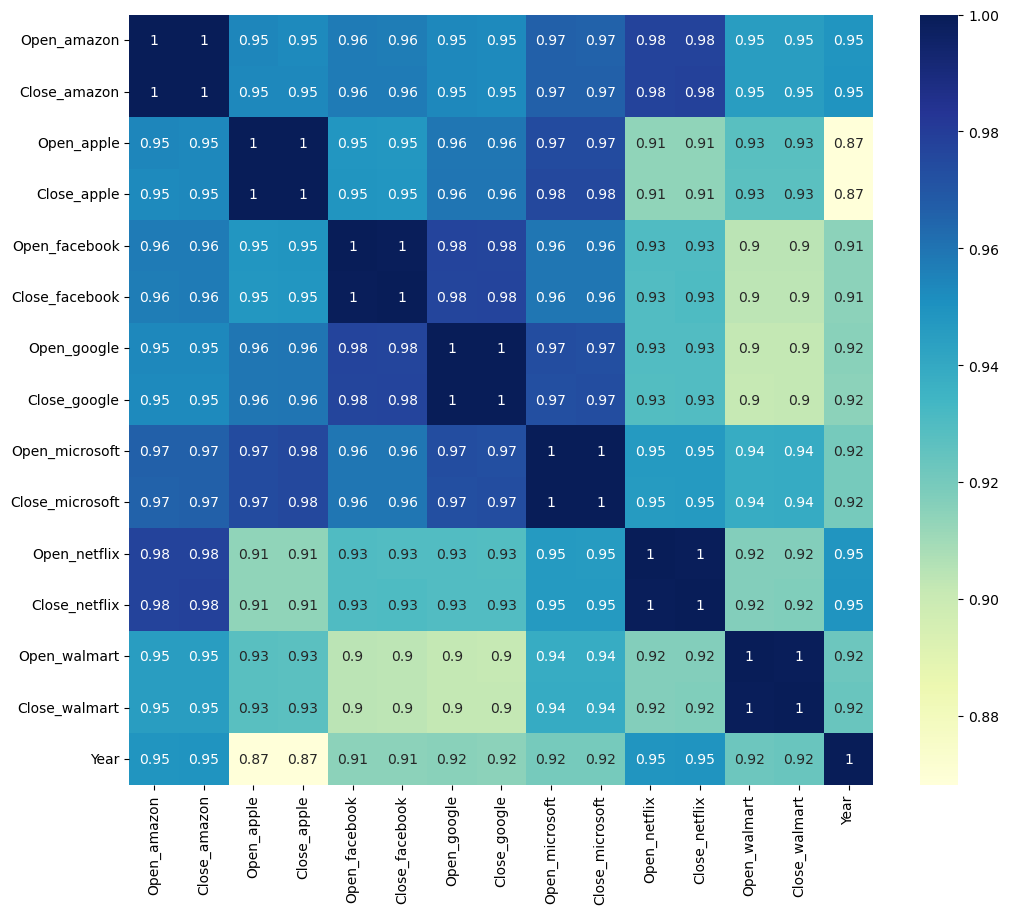

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(dfa.corr(),annot=True,cmap='YlGnBu')

In [18]:
#reading the new dataset

In [19]:
data = pd.read_csv('final_combined.csv')

In [20]:
data.isnull().sum()

Date               0
Open_amazon        0
Close_amazon       0
Open_apple         0
Close_apple        0
Open_facebook      0
Close_facebook     0
Open_google        0
Close_google       0
Open_microsoft     0
Close_microsoft    0
Open_netflix       0
Close_netflix      0
Open_walmart       0
Close_walmart      0
Year               0
dtype: int64

In [21]:
data.columns

Index(['Date', 'Open_amazon', 'Close_amazon', 'Open_apple', 'Close_apple',
       'Open_facebook', 'Close_facebook', 'Open_google', 'Close_google',
       'Open_microsoft', 'Close_microsoft', 'Open_netflix', 'Close_netflix',
       'Open_walmart', 'Close_walmart', 'Year'],
      dtype='object')

In [22]:
data.shape

(1761, 16)

# Anomaly Detection

# ONECLASS-SVM

In [23]:

from sklearn.svm import OneClassSVM

# Assuming you already have the 'data' DataFrame and the 'Open_amazon' and 'Close_amazon' columns.
features = data[['Open_amazon', 'Close_amazon', 'Open_apple', 'Close_apple',
       'Open_facebook', 'Close_facebook', 'Open_google', 'Close_google',
       'Open_microsoft', 'Close_microsoft', 'Open_netflix', 'Close_netflix',
       'Open_walmart', 'Close_walmart']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# One-Class SVM algorithm
model = OneClassSVM(nu=0.05)  # nu sets the threshold for anomaly detection
anomaly_scores = model.fit_predict(scaled_features)
data['AnomalyScore1'] = -model.decision_function(scaled_features)  # The One-Class SVM algorithm provides negative scores, so we convert them to positive.

# Identify anomalies
data['IsAnomaly'] = anomaly_scores
anomalies = data[data['IsAnomaly'] == -1]

print(anomalies)


            Date  Open_amazon  Close_amazon  Open_apple  Close_apple  \
1     2015-01-05   307.010010    302.190002   27.072500    26.562500   
2     2015-01-06   302.239990    295.290009   26.635000    26.565001   
3     2015-01-07   297.500000    298.420013   26.799999    26.937500   
4     2015-01-08   300.320007    300.459991   27.307501    27.972500   
5     2015-01-09   301.480011    296.929993   28.167500    28.002501   
...          ...          ...           ...         ...          ...   
1736  2021-11-23  3585.040039   3580.040039  144.759995   146.231255   
1737  2021-11-24  3562.669922   3580.409912  144.759995   146.231255   
1739  2021-11-29  3547.639893   3561.570068  144.759995   146.231255   
1759  2021-12-28  3403.649902   3413.219971  144.759995   146.231255   
1760  2021-12-29  3416.800049   3384.020020  144.759995   146.231255   

      Open_facebook  Close_facebook  Open_google  Close_google  \
1         77.980003       77.190002   521.827332    512.463013   
2  

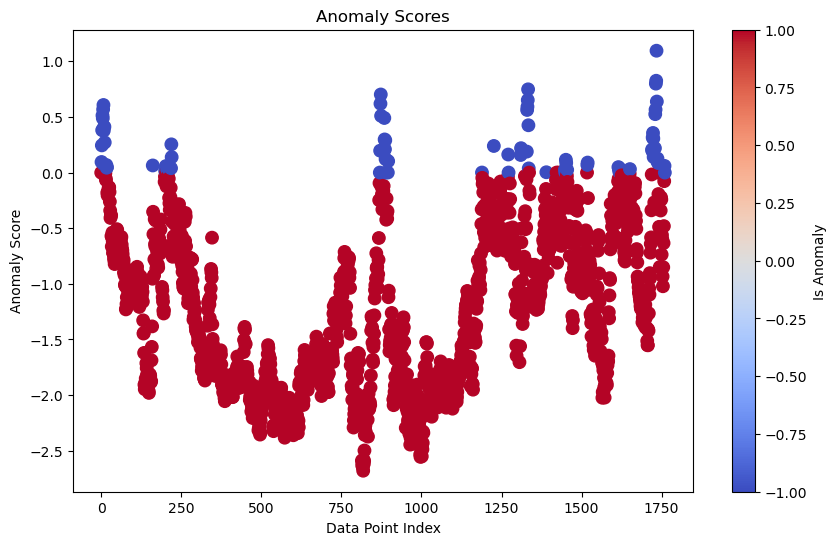

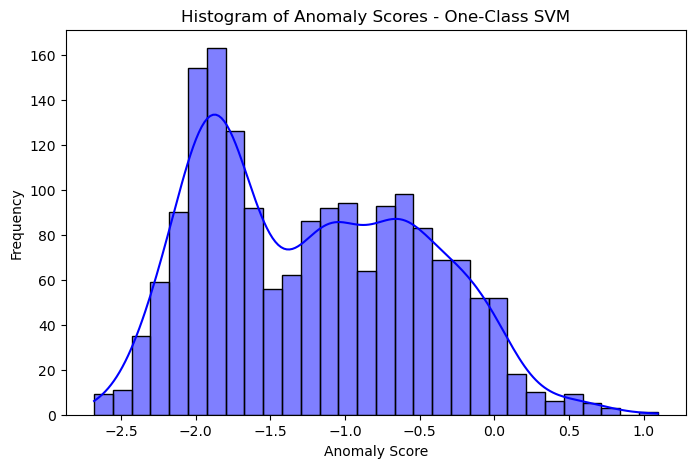

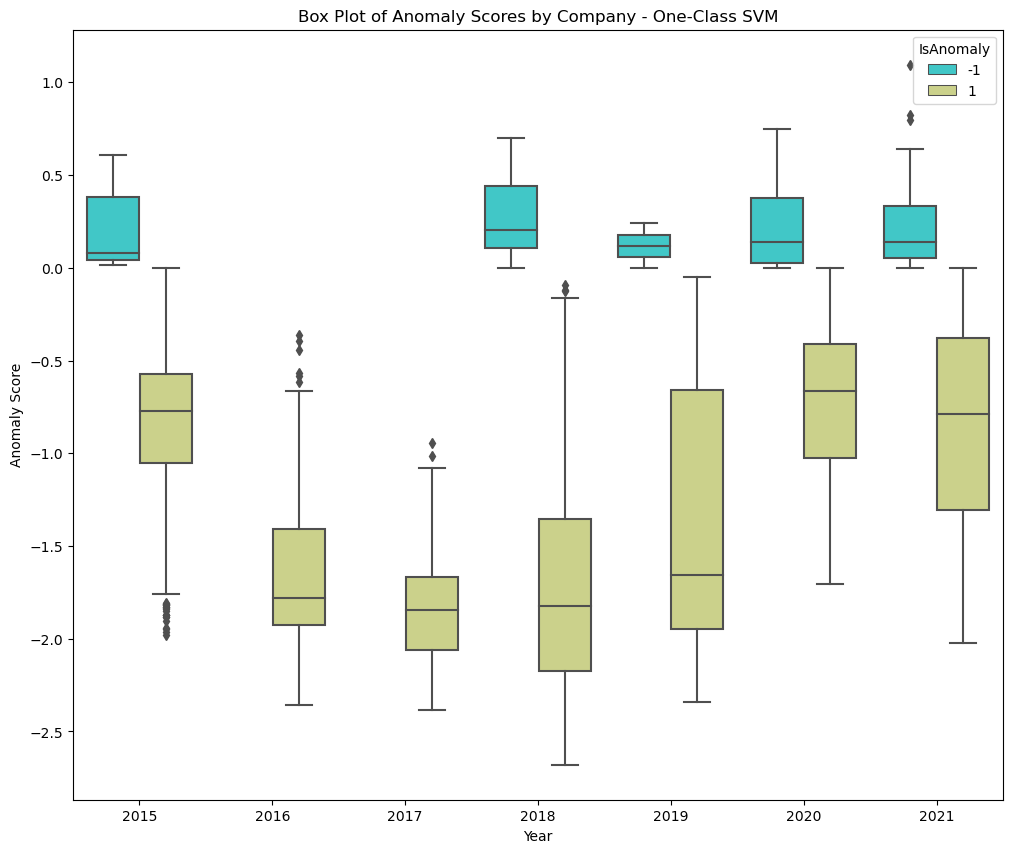

In [24]:
# Scatter plot to visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['AnomalyScore1'], c=data['IsAnomaly'], cmap='coolwarm', s=80)
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores')
plt.colorbar(label='Is Anomaly')
plt.show()

# Histogram of anomaly scores
plt.figure(figsize=(8, 5))
sns.histplot(data['AnomalyScore1'], bins=30, kde=True, color='b')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores - One-Class SVM')
plt.show()

# Box plot of anomaly scores by year
plt.figure(figsize=(12, 10))
sns.boxplot(x='Year', y='AnomalyScore1', data=data, hue='IsAnomaly', palette='rainbow')
plt.xlabel('Year')
plt.ylabel('Anomaly Score')
plt.title('Box Plot of Anomaly Scores by Company - One-Class SVM')
plt.show()

# ISOLATION FOREST

In [25]:
from sklearn.ensemble import IsolationForest

features = data[['Open_amazon', 'Close_amazon', 'Open_apple', 'Close_apple',
       'Open_facebook', 'Close_facebook', 'Open_google', 'Close_google',
       'Open_microsoft', 'Close_microsoft', 'Open_netflix', 'Close_netflix',
       'Open_walmart', 'Close_walmart']]

#SCALING
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#MODELING
model = IsolationForest(contamination=0.05, random_state=42) # contamination sets the threshold for anomaly detection
model.fit(scaled_features)
anomaly_scores = model.decision_function(scaled_features)

data['AnomalyScore'] = anomaly_scores
data['IsAnomaly'] = model.predict(scaled_features)
anomalies_iso = data[data['IsAnomaly'] == -1]

In [26]:
print(anomalies_iso)

            Date  Open_amazon  Close_amazon  Open_apple  Close_apple  \
2     2015-01-06   302.239990    295.290009   26.635000    26.565001   
3     2015-01-07   297.500000    298.420013   26.799999    26.937500   
4     2015-01-08   300.320007    300.459991   27.307501    27.972500   
5     2015-01-09   301.480011    296.929993   28.167500    28.002501   
6     2015-01-12   297.559998    291.410004   28.150000    27.312500   
...          ...          ...           ...         ...          ...   
1755  2021-12-21  3357.010010   3408.340088  144.759995   146.231255   
1756  2021-12-22  3385.399902   3420.739990  144.759995   146.231255   
1757  2021-12-23  3408.560059   3421.370117  144.759995   146.231255   
1758  2021-12-27  3420.739990   3393.389893  144.759995   146.231255   
1759  2021-12-28  3403.649902   3413.219971  144.759995   146.231255   

      Open_facebook  Close_facebook  Open_google  Close_google  \
2         77.230003       76.150002   513.589966    500.585632   
3  

# VISUALIZATION

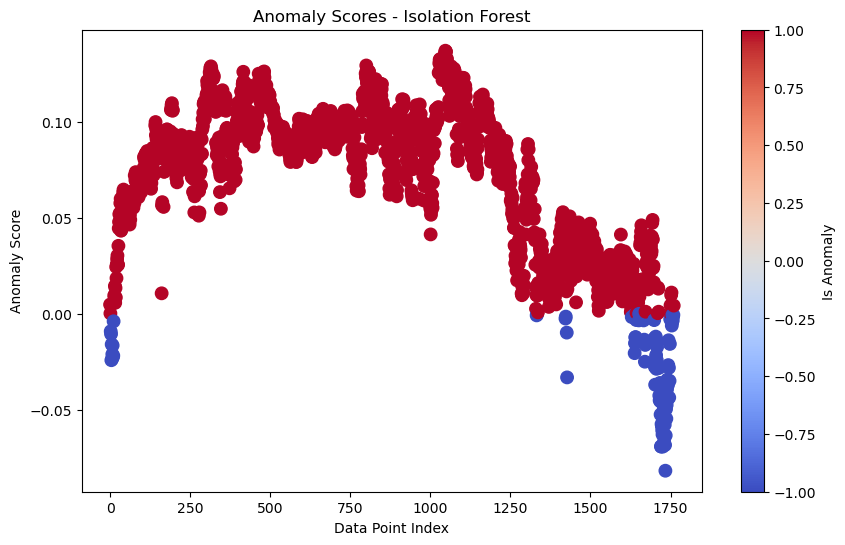

In [27]:
#SCATTERPLOT 

plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['AnomalyScore'], c=data['IsAnomaly'], cmap='coolwarm', s=80)
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores - Isolation Forest')
plt.colorbar(label='Is Anomaly')
plt.show()


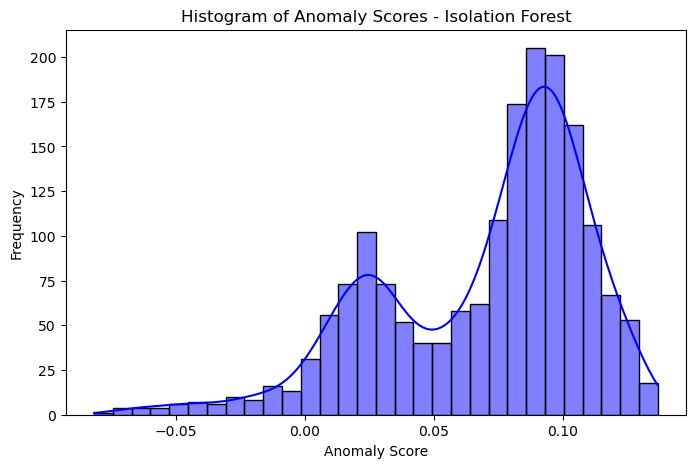

In [28]:
#HISTOGRAM

plt.figure(figsize=(8, 5))
sns.histplot(data['AnomalyScore'], bins=30, kde=True, color='b')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores - Isolation Forest')
plt.show()


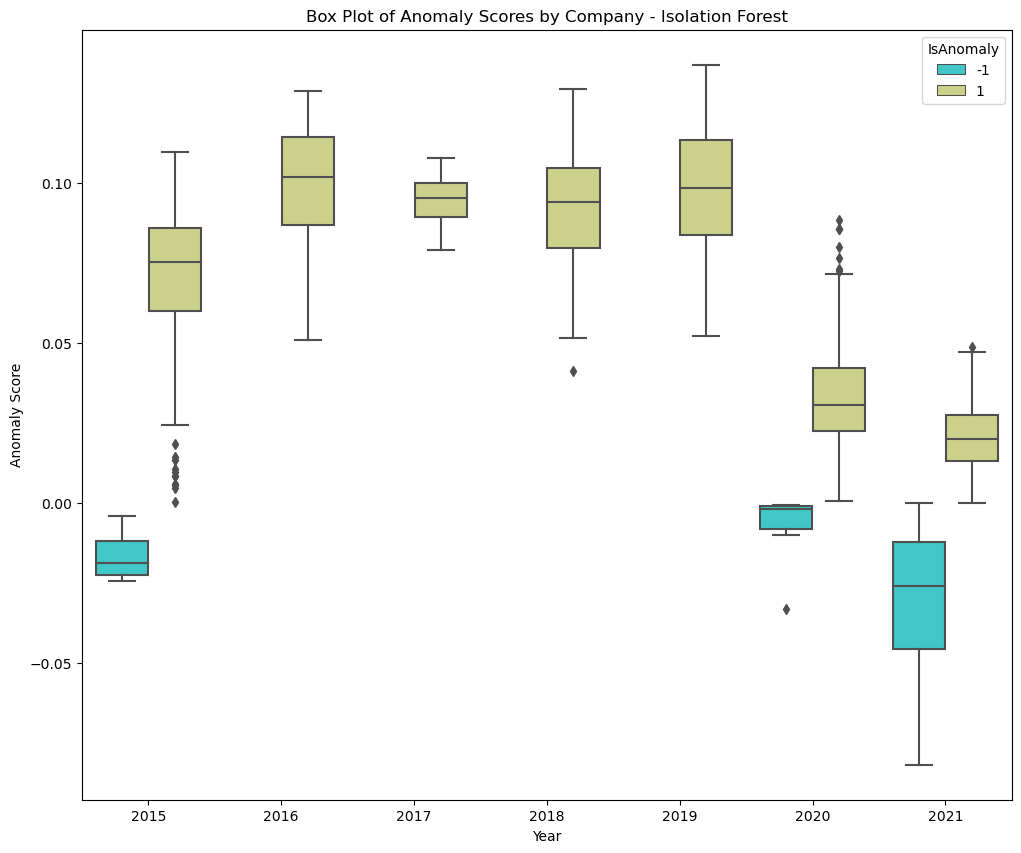

In [29]:
#BARPLOT

plt.figure(figsize=(12, 10))
sns.boxplot(x='Year', y='AnomalyScore', data=data, hue='IsAnomaly', palette='rainbow')
plt.xlabel('Year')
plt.ylabel('Anomaly Score')
plt.title('Box Plot of Anomaly Scores by Company - Isolation Forest')
plt.show()

# localoultierFactor

In [30]:
from sklearn.neighbors import LocalOutlierFactor

# Assuming you already have the 'data' DataFrame and the necessary columns.
features = data[['Open_amazon', 'Close_amazon', 'Open_apple', 'Close_apple',
       'Open_facebook', 'Close_facebook', 'Open_google', 'Close_google',
       'Open_microsoft', 'Close_microsoft', 'Open_netflix', 'Close_netflix',
       'Open_walmart', 'Close_walmart']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# LOF algorithm
model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
anomaly_scores = -model.fit_predict(scaled_features)  # The LOF algorithm provides negative scores, so we convert them to positive.
data['AnomalyScore1'] = -model.negative_outlier_factor_

# Predict anomalies
data['IsAnomaly'] = model.fit_predict(scaled_features)

# Filter the DataFrame to get only anomalies
anomalies_loc= data[data['IsAnomaly'] == -1]

In [31]:
anomalies_loc.head()

,Date,Open_amazon,Close_amazon,Open_apple,Close_apple,Open_facebook,Close_facebook,Open_google,Close_google,Open_microsoft,Close_microsoft,Open_netflix,Close_netflix,Open_walmart,Close_walmart,Year,AnomalyScore1,IsAnomaly,AnomalyScore
134,2015-07-16,465.500000,475.480011,31.934999,32.127499,90.279999,90.849998,565.119995,579.849976,46.009998,46.660000,111.019997,115.809998,73.970001,73.830002,2015,1.482719,-1,0.078783
161,2015-08-24,463.579987,463.369995,23.717501,25.780001,77.029999,82.089996,573.000000,589.609985,40.450001,41.680000,88.750000,96.879997,63.740002,63.950001,2015,1.944428,-1,0.010570
162,2015-08-25,487.489990,466.369995,27.777500,25.934999,86.949997,83.000000,614.909973,582.059998,42.570000,40.470001,107.750000,101.519997,65.449997,63.099998,2015,1.264340,-1,0.056363
197,2015-10-14,551.340027,544.830017,27.822500,27.552500,94.080002,94.070000,653.210022,651.159973,46.650002,46.680000,111.500000,110.230003,66.610001,60.029999,2015,1.512557,-1,0.093619
198,2015-10-15,547.750000,562.440002,27.732500,27.965000,94.989998,95.959999,654.659973,661.739990,47.009998,47.009998,103.769997,101.089996,59.700001,59.330002,2015,1.317345,-1,0.082323


In [32]:
anomalies_loc.tail()

,Date,Open_amazon,Close_amazon,Open_apple,Close_apple,Open_facebook,Close_facebook,Open_google,Close_google,Open_microsoft,Close_microsoft,Open_netflix,Close_netflix,Open_walmart,Close_walmart,Year,AnomalyScore1,IsAnomaly,AnomalyScore
1422,2020-08-26,3351.110107,3441.850098,126.180000,126.522499,284.000000,303.910004,1608.000000,1652.380005,217.880005,221.149994,492.500000,547.530029,130.210007,130.699997,2020,1.542684,-1,-0.002564
1423,2020-08-27,3450.050049,3400.000000,127.142502,125.010002,300.160004,293.220001,1653.680054,1634.329956,222.889999,226.580002,537.780029,526.270020,131.080002,136.630005,2020,1.362946,-1,-0.001554
1426,2020-09-01,3489.580078,3499.120117,132.759995,134.179993,294.709991,295.440002,1636.630005,1660.709961,225.509995,227.270004,532.599976,556.549988,141.199997,147.589996,2020,1.332577,-1,-0.009881
1427,2020-09-02,3547.000000,3531.449951,137.589996,131.399994,298.880005,302.500000,1673.775024,1728.280029,227.970001,231.649994,553.780029,552.840027,151.250000,147.679993,2020,1.506335,-1,-0.033196
1600,2021-05-12,3185.000000,3151.939941,123.400002,122.769997,301.130005,302.549988,2261.709961,2239.080078,242.169998,239.000000,486.829987,484.980011,138.869995,135.940002,2021,1.291181,-1,0.006361


In [33]:
anomalies_loc.shape

(88, 19)

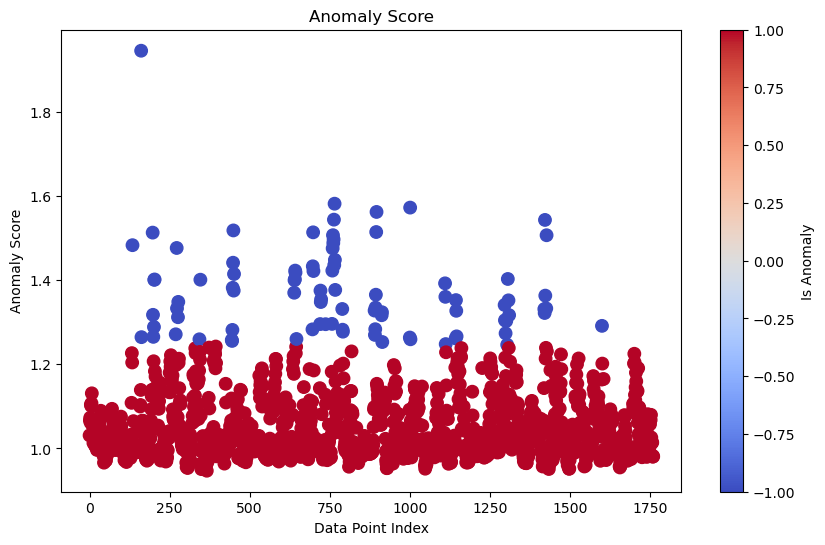

In [34]:
# Scatter plot to visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['AnomalyScore1'], c=data['IsAnomaly'], cmap='coolwarm', s=80)
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Score')
plt.colorbar(label='Is Anomaly')
plt.show()

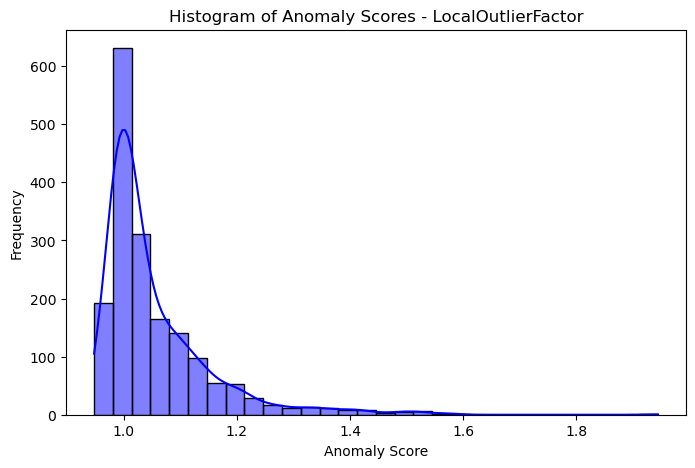

In [35]:
# Histogram of anomaly scores
plt.figure(figsize=(8, 5))
sns.histplot(data['AnomalyScore1'], bins=30, kde=True, color='b')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores - LocalOutlierFactor')
plt.show()


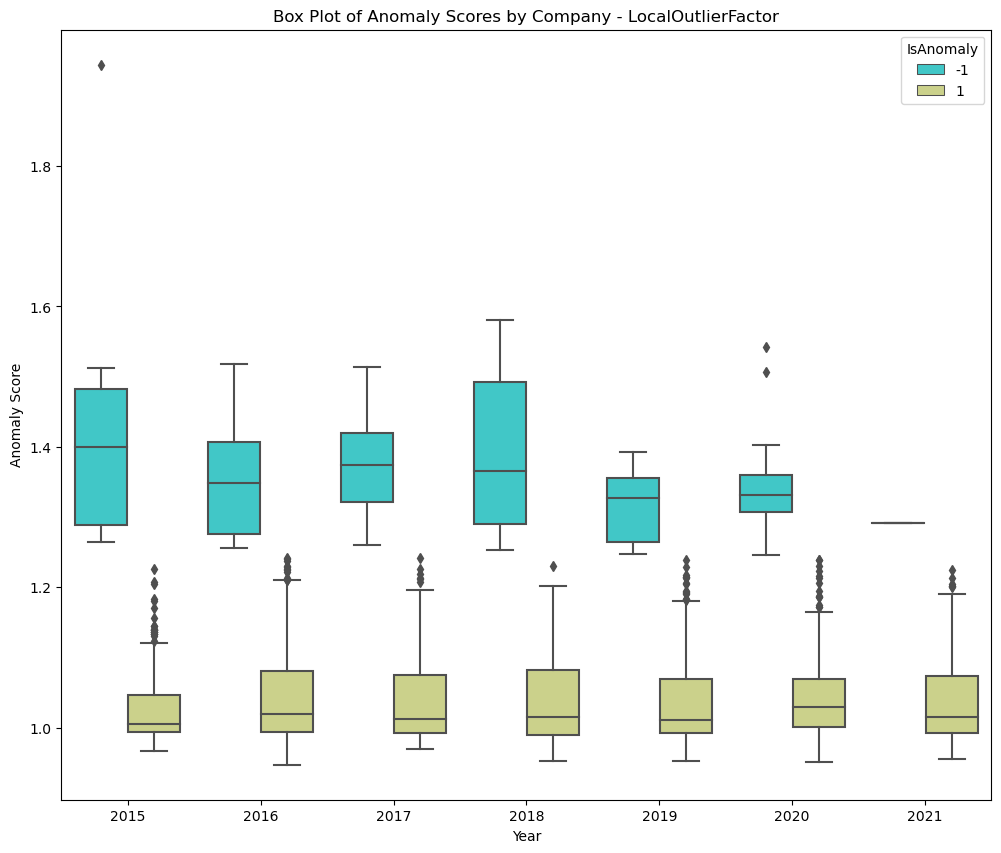

In [36]:
# Box plot of anomaly scores by year
plt.figure(figsize=(12, 10))
sns.boxplot(x='Year', y='AnomalyScore1', data=data, hue='IsAnomaly', palette='rainbow')
plt.xlabel('Year')
plt.ylabel('Anomaly Score')
plt.title('Box Plot of Anomaly Scores by Company - LocalOutlierFactor')
plt.show()

# SUMMARY


**What is Local Outlier Factor?**

The Local Outlier Factor (LOF) is a popular anomaly detection algorithm used to identify outliers or anomalies in a dataset. Unlike global methods that treat all data points equally, LOF focuses on the local density deviation of each data point concerning its neighbors. It measures how much more or less dense a data point's local neighborhood is compared to its neighbors. In essence, LOF assesses if a data point is an outlier by examining whether it is surrounded by a significantly different density of data points than its neighbors. LOF assigns an anomaly score to each data point, where a higher score indicates a higher likelihood of being an outlier. Data points with LOF scores substantially greater than 1 are considered outliers, while those close to 1 are considered normal.

* The IsolationForest model predicted that out of 1761 rows, 88 are found as outliers or anomalies.

# So we are taking the localoutlier factor as the anomaly detection model

In [37]:
#to find insights we are studing the predicted anomalies using the year and months

In [38]:
anomalies_loc.columns

Index(['Date', 'Open_amazon', 'Close_amazon', 'Open_apple', 'Close_apple',
       'Open_facebook', 'Close_facebook', 'Open_google', 'Close_google',
       'Open_microsoft', 'Close_microsoft', 'Open_netflix', 'Close_netflix',
       'Open_walmart', 'Close_walmart', 'Year', 'AnomalyScore1', 'IsAnomaly',
       'AnomalyScore'],
      dtype='object')

In [39]:
anomalies_loc['Date']= anomalies_loc['Date'].apply(pd.to_datetime)

In [40]:
anomalies_loc = anomalies_loc.sort_values(by='Date')


In [41]:
ano_amazon=anomalies_loc[['Date', 'Open_amazon', 'Close_amazon', 'Year', 'AnomalyScore1', 'IsAnomaly',
       'AnomalyScore']]

In [42]:
ano_apple=anomalies_loc[['Date', 'Open_apple', 'Close_apple', 'Year', 'AnomalyScore1', 'IsAnomaly',
       'AnomalyScore']]

In [43]:
ano_facebook=anomalies_loc[['Date', 'Open_facebook', 'Close_facebook', 'Year', 'AnomalyScore1', 'IsAnomaly',
       'AnomalyScore']]

In [44]:
ano_google=anomalies_loc[['Date', 'Open_google', 'Close_google', 'Year', 'AnomalyScore1', 'IsAnomaly',
       'AnomalyScore']]

In [45]:
ano_microsoft=anomalies_loc[['Date', 'Open_microsoft', 'Close_microsoft', 'Year', 'AnomalyScore1', 'IsAnomaly',
       'AnomalyScore']]

In [46]:
ano_netflix=anomalies_loc[['Date', 'Open_netflix', 'Close_netflix', 'Year', 'AnomalyScore1', 'IsAnomaly',
       'AnomalyScore']]

In [47]:
ano_walmart=anomalies_loc[['Date', 'Open_walmart', 'Close_walmart', 'Year', 'AnomalyScore1', 'IsAnomaly',
       'AnomalyScore']]

# 2015

In [48]:
# Filter the dataframes for the year 2015
ano_amazon_2015 = anomalies_loc[anomalies_loc['Year'] == 2015]
ano_apple_2015 = ano_apple[ano_apple['Year'] == 2015]
ano_facebook_2015 = ano_facebook[ano_facebook['Year'] == 2015]
ano_google_2015 = ano_google[ano_google['Year'] == 2015]
ano_microsoft_2015 = ano_microsoft[ano_microsoft['Year'] == 2015]
ano_netflix_2015 = ano_netflix[ano_netflix['Year'] == 2015]
ano_walmart_2015 = ano_walmart[ano_walmart['Year'] == 2015]

Open

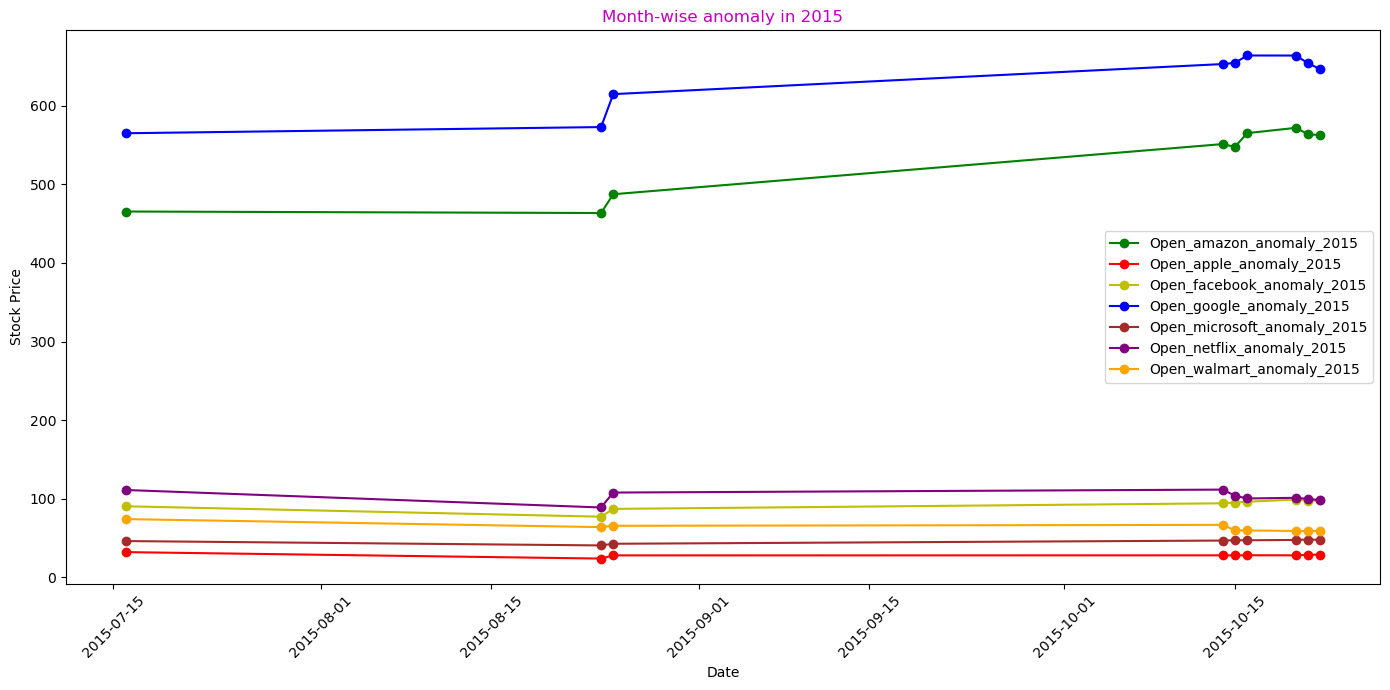

In [49]:
plt.figure(figsize=(14, 7))

# Plot the data for each company
plt.plot(ano_amazon_2015['Date'], ano_amazon_2015['Open_amazon'], color='g', marker='o', label='Open_amazon_anomaly_2015')
plt.plot(ano_apple_2015['Date'], ano_apple_2015['Open_apple'], color='r', marker='o', label='Open_apple_anomaly_2015')
plt.plot(ano_facebook_2015['Date'], ano_facebook_2015['Open_facebook'], color='y', marker='o', label='Open_facebook_anomaly_2015')
plt.plot(ano_google_2015['Date'], ano_google_2015['Open_google'], color='b', marker='o', label='Open_google_anomaly_2015')
plt.plot(ano_microsoft_2015['Date'], ano_microsoft_2015['Open_microsoft'], color='brown', marker='o', label='Open_microsoft_anomaly_2015')
plt.plot(ano_netflix_2015['Date'], ano_netflix_2015['Open_netflix'], color='purple', marker='o', label='Open_netflix_anomaly_2015')
plt.plot(ano_walmart_2015['Date'], ano_walmart_2015['Open_walmart'], color='orange', marker='o', label='Open_walmart_anomaly_2015')

plt.title('Month-wise anomaly in 2015', color='m')
plt.ylabel('Stock Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()


Close

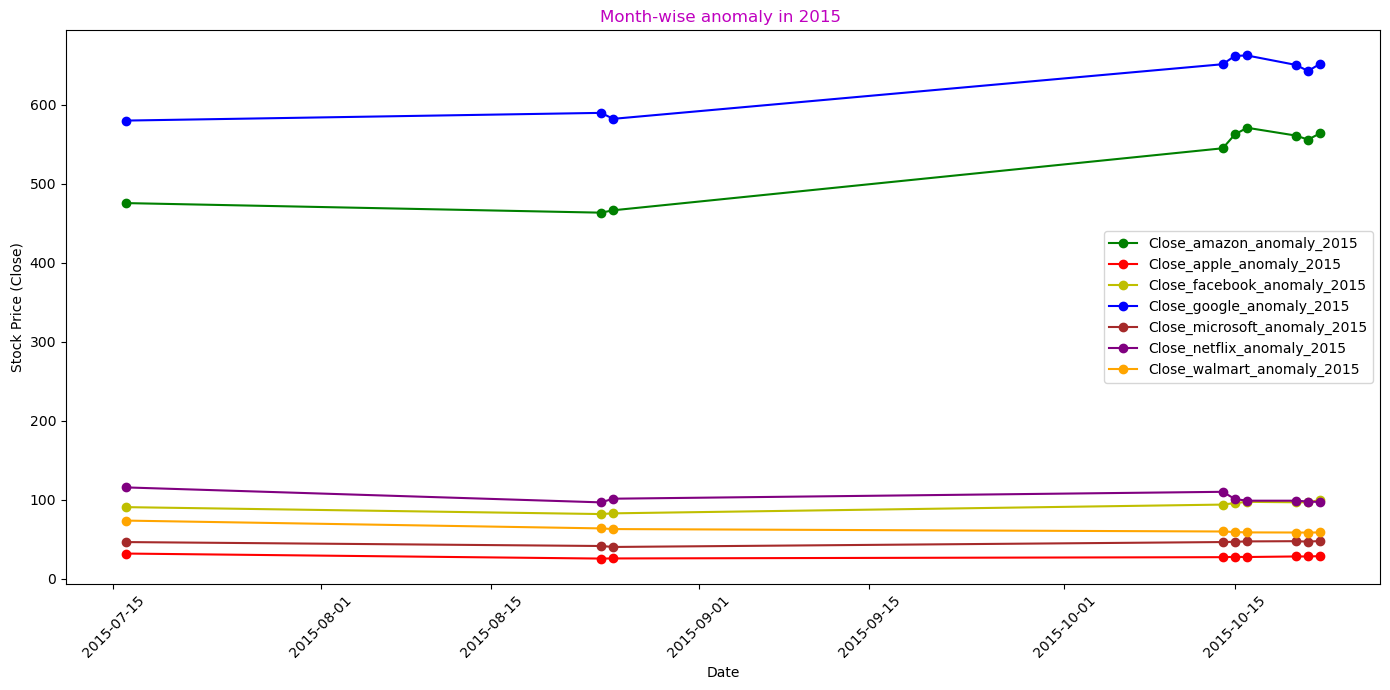

In [50]:
plt.figure(figsize=(14, 7))

# Plot the 'Close' prices for each company
plt.plot(ano_amazon_2015['Date'], ano_amazon_2015['Close_amazon'], color='g', marker='o', label='Close_amazon_anomaly_2015')
plt.plot(ano_apple_2015['Date'], ano_apple_2015['Close_apple'], color='r', marker='o', label='Close_apple_anomaly_2015')
plt.plot(ano_facebook_2015['Date'], ano_facebook_2015['Close_facebook'], color='y', marker='o', label='Close_facebook_anomaly_2015')
plt.plot(ano_google_2015['Date'], ano_google_2015['Close_google'], color='b', marker='o', label='Close_google_anomaly_2015')
plt.plot(ano_microsoft_2015['Date'], ano_microsoft_2015['Close_microsoft'], color='brown', marker='o', label='Close_microsoft_anomaly_2015')
plt.plot(ano_netflix_2015['Date'], ano_netflix_2015['Close_netflix'], color='purple', marker='o', label='Close_netflix_anomaly_2015')
plt.plot(ano_walmart_2015['Date'], ano_walmart_2015['Close_walmart'], color='orange', marker='o', label='Close_walmart_anomaly_2015')

plt.title('Month-wise anomaly in 2015 ', color='m')
plt.ylabel('Stock Price (Close)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()


# 2016

In [51]:
# Filter the dataframes for the year 2016
ano_amazon_2016 = ano_amazon[ano_amazon['Year'] == 2016]
ano_apple_2016 = ano_apple[ano_apple['Year'] == 2016]
ano_facebook_2016 = ano_facebook[ano_facebook['Year'] == 2016]
ano_google_2016 = ano_google[ano_google['Year'] == 2016]
ano_microsoft_2016 = ano_microsoft[ano_microsoft['Year'] == 2016]
ano_netflix_2016 = ano_netflix[ano_netflix['Year'] == 2016]
ano_walmart_2016 = ano_walmart[ano_walmart['Year'] == 2016]

Open

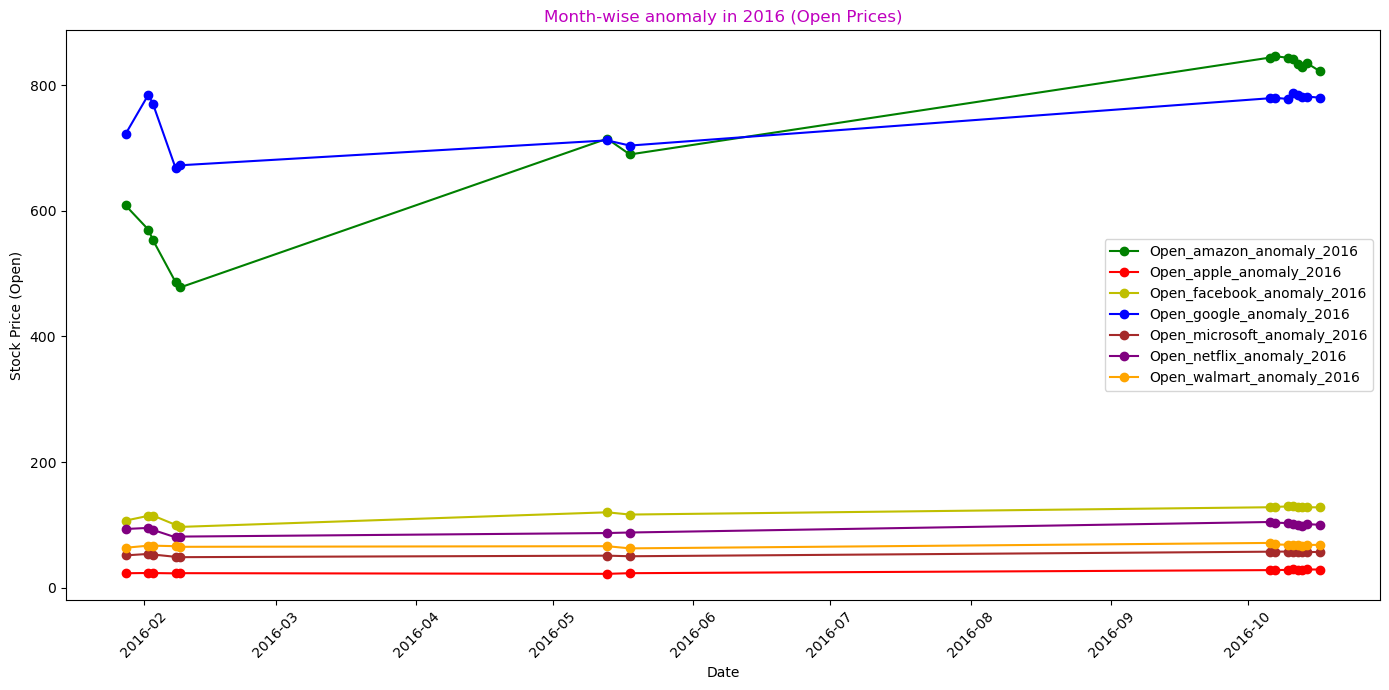

In [52]:
plt.figure(figsize=(14, 7))
# Plot the 'Open' prices for each company in 2016
plt.plot(ano_amazon_2016['Date'], ano_amazon_2016['Open_amazon'], color='g', marker='o', label='Open_amazon_anomaly_2016')
plt.plot(ano_apple_2016['Date'], ano_apple_2016['Open_apple'], color='r', marker='o', label='Open_apple_anomaly_2016')
plt.plot(ano_facebook_2016['Date'], ano_facebook_2016['Open_facebook'], color='y', marker='o', label='Open_facebook_anomaly_2016')
plt.plot(ano_google_2016['Date'], ano_google_2016['Open_google'], color='b', marker='o', label='Open_google_anomaly_2016')
plt.plot(ano_microsoft_2016['Date'], ano_microsoft_2016['Open_microsoft'], color='brown', marker='o', label='Open_microsoft_anomaly_2016')
plt.plot(ano_netflix_2016['Date'], ano_netflix_2016['Open_netflix'], color='purple', marker='o', label='Open_netflix_anomaly_2016')
plt.plot(ano_walmart_2016['Date'], ano_walmart_2016['Open_walmart'], color='orange', marker='o', label='Open_walmart_anomaly_2016')

plt.title('Month-wise anomaly in 2016 (Open Prices)', color='m')
plt.ylabel('Stock Price (Open)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

Close

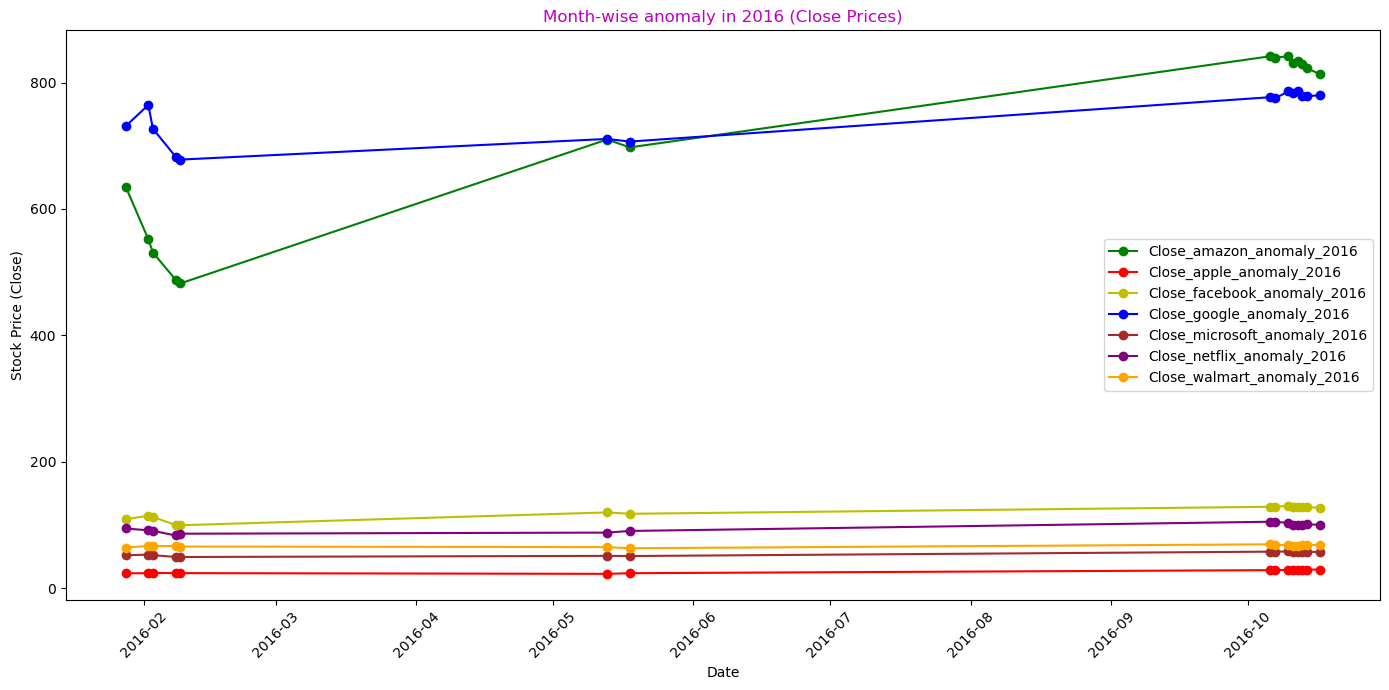

In [53]:
# Create a new figure for 'Close' prices in 2016
plt.figure(figsize=(14, 7))

# Plot the 'Close' prices for each company in 2016
plt.plot(ano_amazon_2016['Date'], ano_amazon_2016['Close_amazon'], color='g', marker='o', label='Close_amazon_anomaly_2016')
plt.plot(ano_apple_2016['Date'], ano_apple_2016['Close_apple'], color='r', marker='o', label='Close_apple_anomaly_2016')
plt.plot(ano_facebook_2016['Date'], ano_facebook_2016['Close_facebook'], color='y', marker='o', label='Close_facebook_anomaly_2016')
plt.plot(ano_google_2016['Date'], ano_google_2016['Close_google'], color='b', marker='o', label='Close_google_anomaly_2016')
plt.plot(ano_microsoft_2016['Date'], ano_microsoft_2016['Close_microsoft'], color='brown', marker='o', label='Close_microsoft_anomaly_2016')
plt.plot(ano_netflix_2016['Date'], ano_netflix_2016['Close_netflix'], color='purple', marker='o', label='Close_netflix_anomaly_2016')
plt.plot(ano_walmart_2016['Date'], ano_walmart_2016['Close_walmart'], color='orange', marker='o', label='Close_walmart_anomaly_2016')

plt.title('Month-wise anomaly in 2016 (Close Prices)', color='m')
plt.ylabel('Stock Price (Close)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

# 2017

In [54]:
# Filter the dataframes for the year 2017
ano_amazon_2017 = ano_amazon[ano_amazon['Year'] == 2017]
ano_apple_2017 = ano_apple[ano_apple['Year'] == 2017]
ano_facebook_2017 = ano_facebook[ano_facebook['Year'] == 2017]
ano_google_2017 = ano_google[ano_google['Year'] == 2017]
ano_microsoft_2017 = ano_microsoft[ano_microsoft['Year'] == 2017]
ano_netflix_2017 = ano_netflix[ano_netflix['Year'] == 2017]
ano_walmart_2017 = ano_walmart[ano_walmart['Year'] == 2017]

Open

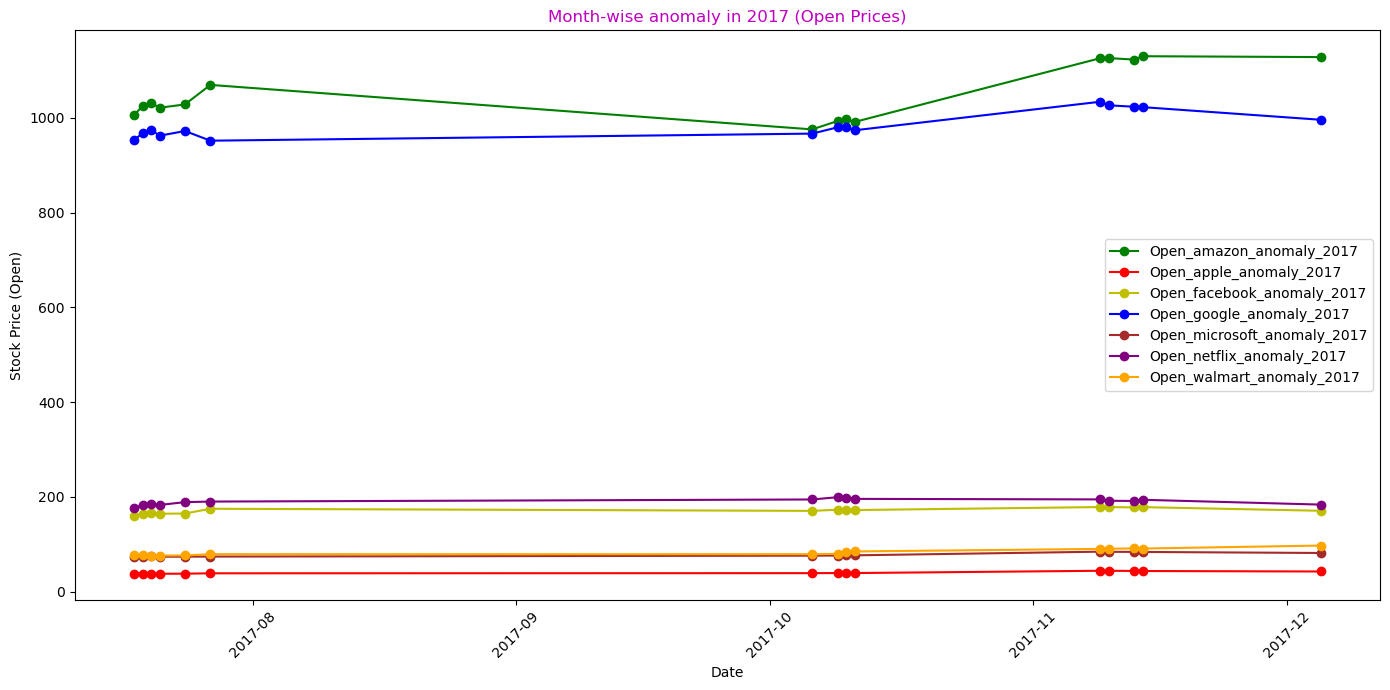

In [55]:
plt.figure(figsize=(14, 7))

# Plot the 'Open' prices for each company in 2017
plt.plot(ano_amazon_2017['Date'], ano_amazon_2017['Open_amazon'], color='g', marker='o', label='Open_amazon_anomaly_2017')
plt.plot(ano_apple_2017['Date'], ano_apple_2017['Open_apple'], color='r', marker='o', label='Open_apple_anomaly_2017')
plt.plot(ano_facebook_2017['Date'], ano_facebook_2017['Open_facebook'], color='y', marker='o', label='Open_facebook_anomaly_2017')
plt.plot(ano_google_2017['Date'], ano_google_2017['Open_google'], color='b', marker='o', label='Open_google_anomaly_2017')
plt.plot(ano_microsoft_2017['Date'], ano_microsoft_2017['Open_microsoft'], color='brown', marker='o', label='Open_microsoft_anomaly_2017')
plt.plot(ano_netflix_2017['Date'], ano_netflix_2017['Open_netflix'], color='purple', marker='o', label='Open_netflix_anomaly_2017')
plt.plot(ano_walmart_2017['Date'], ano_walmart_2017['Open_walmart'], color='orange', marker='o', label='Open_walmart_anomaly_2017')

plt.title('Month-wise anomaly in 2017 (Open Prices)', color='m')
plt.ylabel('Stock Price (Open)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

Close

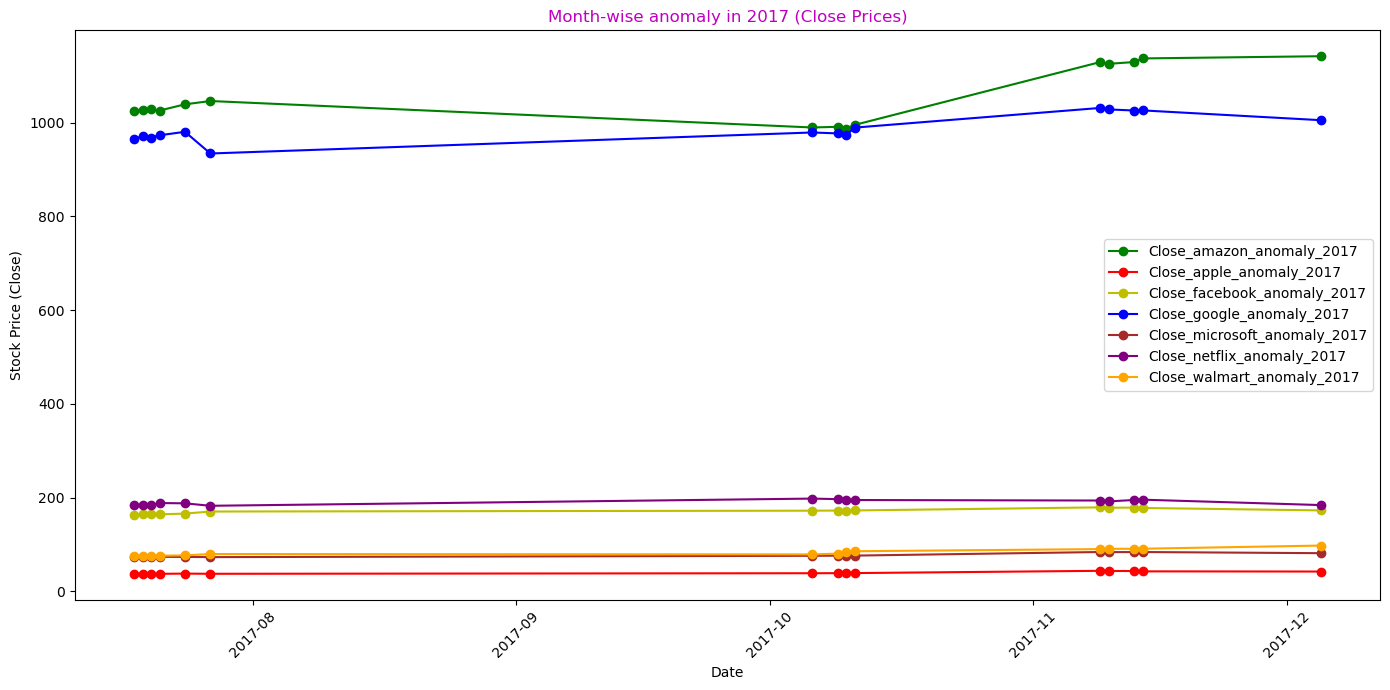

In [56]:
# Create a new figure for 'Close' prices in 2017
plt.figure(figsize=(14, 7))

# Plot the 'Close' prices for each company in 2017
plt.plot(ano_amazon_2017['Date'], ano_amazon_2017['Close_amazon'], color='g', marker='o', label='Close_amazon_anomaly_2017')
plt.plot(ano_apple_2017['Date'], ano_apple_2017['Close_apple'], color='r', marker='o', label='Close_apple_anomaly_2017')
plt.plot(ano_facebook_2017['Date'], ano_facebook_2017['Close_facebook'], color='y', marker='o', label='Close_facebook_anomaly_2017')
plt.plot(ano_google_2017['Date'], ano_google_2017['Close_google'], color='b', marker='o', label='Close_google_anomaly_2017')
plt.plot(ano_microsoft_2017['Date'], ano_microsoft_2017['Close_microsoft'], color='brown', marker='o', label='Close_microsoft_anomaly_2017')
plt.plot(ano_netflix_2017['Date'], ano_netflix_2017['Close_netflix'], color='purple', marker='o', label='Close_netflix_anomaly_2017')
plt.plot(ano_walmart_2017['Date'], ano_walmart_2017['Close_walmart'], color='orange', marker='o', label='Close_walmart_anomaly_2017')

plt.title('Month-wise anomaly in 2017 (Close Prices)', color='m')
plt.ylabel('Stock Price (Close)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

# 2018

In [57]:
# Filter the dataframes for the year 2018
ano_amazon_2018 = ano_amazon[ano_amazon['Year'] == 2018]
ano_apple_2018 = ano_apple[ano_apple['Year'] == 2018]
ano_facebook_2018 = ano_facebook[ano_facebook['Year'] == 2018]
ano_google_2018 = ano_google[ano_google['Year'] == 2018]
ano_microsoft_2018 = ano_microsoft[ano_microsoft['Year'] == 2018]
ano_netflix_2018 = ano_netflix[ano_netflix['Year'] == 2018]
ano_walmart_2018 = ano_walmart[ano_walmart['Year'] == 2018]

Open

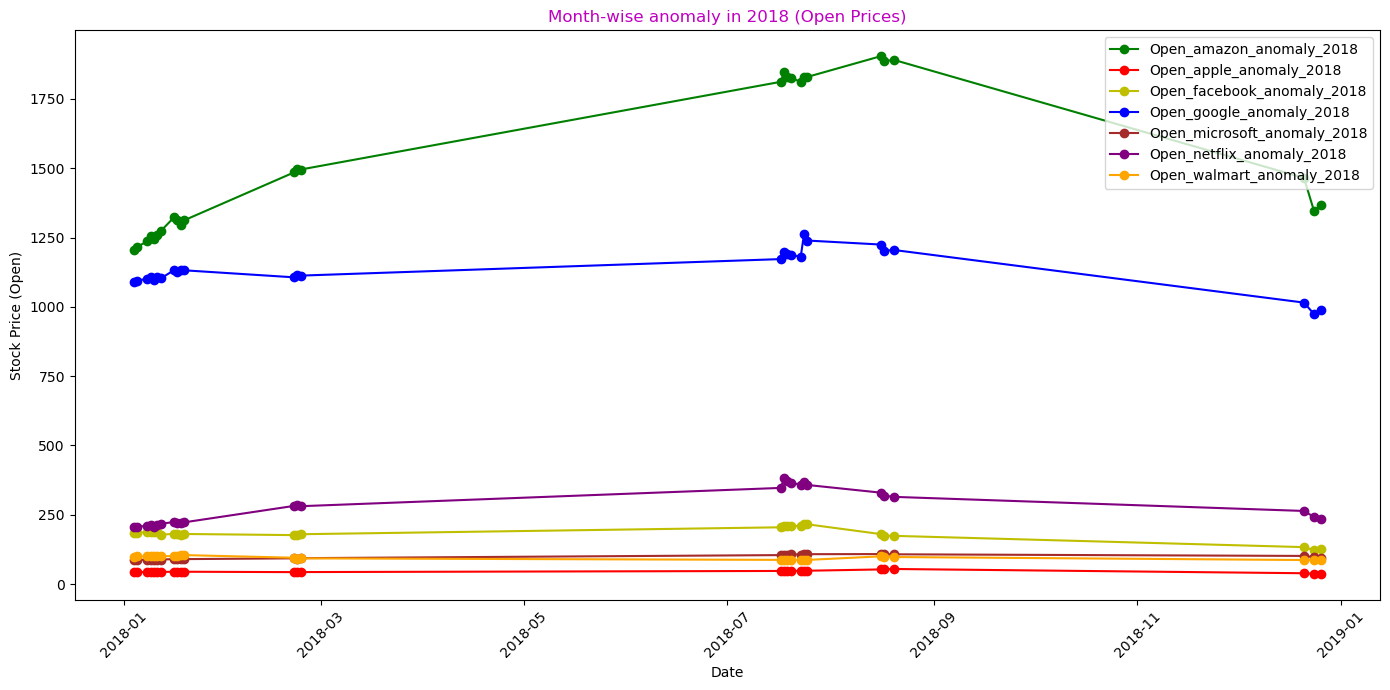

In [58]:
plt.figure(figsize=(14, 7))

# Plot the 'Open' prices for each company in 2018
plt.plot(ano_amazon_2018['Date'], ano_amazon_2018['Open_amazon'], color='g', marker='o', label='Open_amazon_anomaly_2018')
plt.plot(ano_apple_2018['Date'], ano_apple_2018['Open_apple'], color='r', marker='o', label='Open_apple_anomaly_2018')
plt.plot(ano_facebook_2018['Date'], ano_facebook_2018['Open_facebook'], color='y', marker='o', label='Open_facebook_anomaly_2018')
plt.plot(ano_google_2018['Date'], ano_google_2018['Open_google'], color='b', marker='o', label='Open_google_anomaly_2018')
plt.plot(ano_microsoft_2018['Date'], ano_microsoft_2018['Open_microsoft'], color='brown', marker='o', label='Open_microsoft_anomaly_2018')
plt.plot(ano_netflix_2018['Date'], ano_netflix_2018['Open_netflix'], color='purple', marker='o', label='Open_netflix_anomaly_2018')
plt.plot(ano_walmart_2018['Date'], ano_walmart_2018['Open_walmart'], color='orange', marker='o', label='Open_walmart_anomaly_2018')

plt.title('Month-wise anomaly in 2018 (Open Prices)', color='m')
plt.ylabel('Stock Price (Open)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

Close

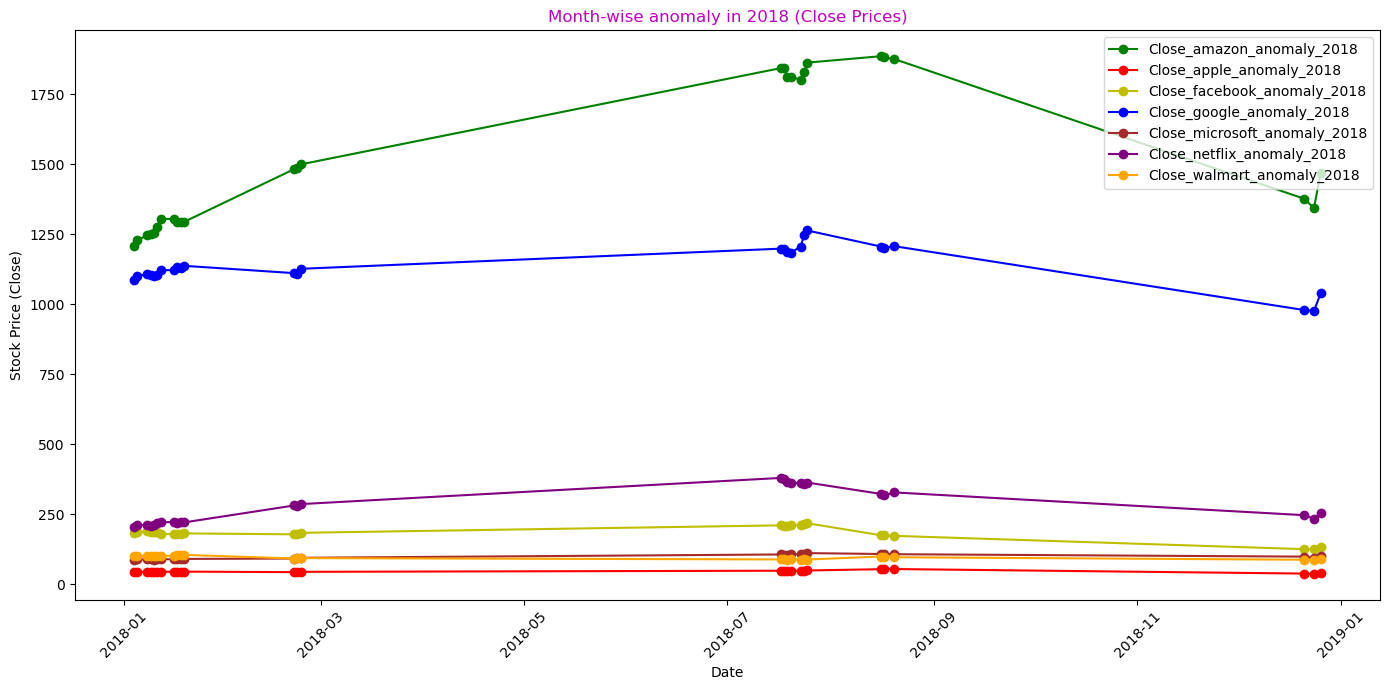

In [59]:
# Create a new figure for 'Close' prices in 2018
plt.figure(figsize=(14, 7))

# Plot the 'Close' prices for each company in 2018
plt.plot(ano_amazon_2018['Date'], ano_amazon_2018['Close_amazon'], color='g', marker='o', label='Close_amazon_anomaly_2018')
plt.plot(ano_apple_2018['Date'], ano_apple_2018['Close_apple'], color='r', marker='o', label='Close_apple_anomaly_2018')
plt.plot(ano_facebook_2018['Date'], ano_facebook_2018['Close_facebook'], color='y', marker='o', label='Close_facebook_anomaly_2018')
plt.plot(ano_google_2018['Date'], ano_google_2018['Close_google'], color='b', marker='o', label='Close_google_anomaly_2018')
plt.plot(ano_microsoft_2018['Date'], ano_microsoft_2018['Close_microsoft'], color='brown', marker='o', label='Close_microsoft_anomaly_2018')
plt.plot(ano_netflix_2018['Date'], ano_netflix_2018['Close_netflix'], color='purple', marker='o', label='Close_netflix_anomaly_2018')
plt.plot(ano_walmart_2018['Date'], ano_walmart_2018['Close_walmart'], color='orange', marker='o', label='Close_walmart_anomaly_2018')

plt.title('Month-wise anomaly in 2018 (Close Prices)', color='m')
plt.ylabel('Stock Price (Close)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

# 2019

In [60]:
# Filter the dataframes for the year 2019
ano_amazon_2019 = ano_amazon[ano_amazon['Year'] == 2019]
ano_apple_2019 = ano_apple[ano_apple['Year'] == 2019]
ano_facebook_2019 = ano_facebook[ano_facebook['Year'] == 2019]
ano_google_2019 = ano_google[ano_google['Year'] == 2019]
ano_microsoft_2019 = ano_microsoft[ano_microsoft['Year'] == 2019]
ano_netflix_2019 = ano_netflix[ano_netflix['Year'] == 2019]
ano_walmart_2019 = ano_walmart[ano_walmart['Year'] == 2019]

Open

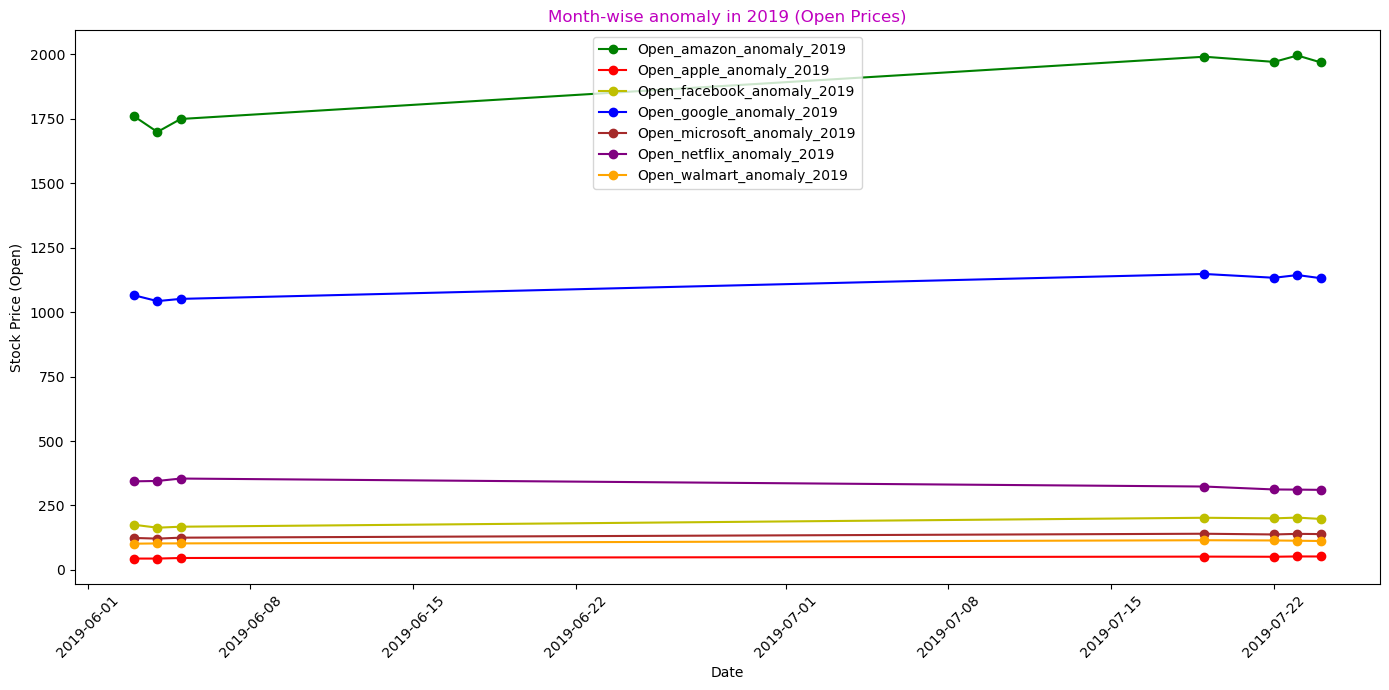

In [61]:
plt.figure(figsize=(14, 7))

# Plot the 'Open' prices for each company in 2019
plt.plot(ano_amazon_2019['Date'], ano_amazon_2019['Open_amazon'], color='g', marker='o', label='Open_amazon_anomaly_2019')
plt.plot(ano_apple_2019['Date'], ano_apple_2019['Open_apple'], color='r', marker='o', label='Open_apple_anomaly_2019')
plt.plot(ano_facebook_2019['Date'], ano_facebook_2019['Open_facebook'], color='y', marker='o', label='Open_facebook_anomaly_2019')
plt.plot(ano_google_2019['Date'], ano_google_2019['Open_google'], color='b', marker='o', label='Open_google_anomaly_2019')
plt.plot(ano_microsoft_2019['Date'], ano_microsoft_2019['Open_microsoft'], color='brown', marker='o', label='Open_microsoft_anomaly_2019')
plt.plot(ano_netflix_2019['Date'], ano_netflix_2019['Open_netflix'], color='purple', marker='o', label='Open_netflix_anomaly_2019')
plt.plot(ano_walmart_2019['Date'], ano_walmart_2019['Open_walmart'], color='orange', marker='o', label='Open_walmart_anomaly_2019')

plt.title('Month-wise anomaly in 2019 (Open Prices)', color='m')
plt.ylabel('Stock Price (Open)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

Close

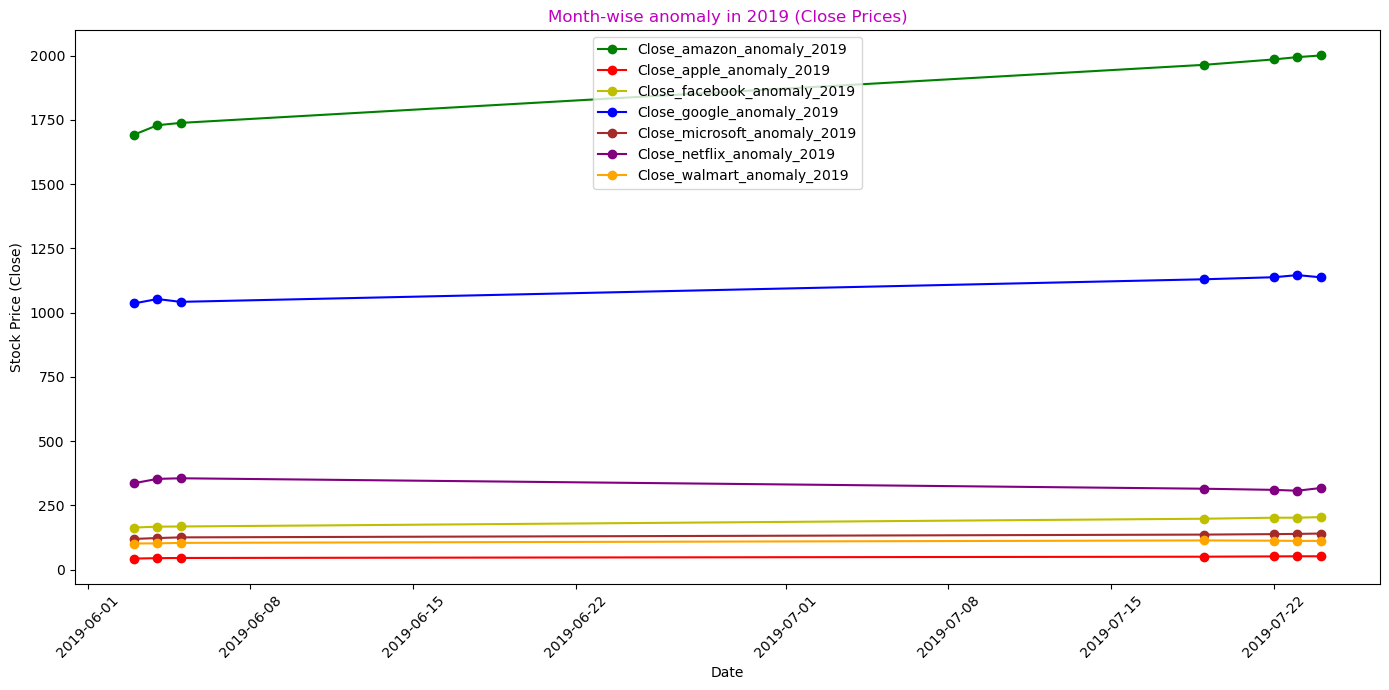

In [62]:
# Create a new figure for 'Close' prices in 2019
plt.figure(figsize=(14, 7))

# Plot the 'Close' prices for each company in 2019
plt.plot(ano_amazon_2019['Date'], ano_amazon_2019['Close_amazon'], color='g', marker='o', label='Close_amazon_anomaly_2019')
plt.plot(ano_apple_2019['Date'], ano_apple_2019['Close_apple'], color='r', marker='o', label='Close_apple_anomaly_2019')
plt.plot(ano_facebook_2019['Date'], ano_facebook_2019['Close_facebook'], color='y', marker='o', label='Close_facebook_anomaly_2019')
plt.plot(ano_google_2019['Date'], ano_google_2019['Close_google'], color='b', marker='o', label='Close_google_anomaly_2019')
plt.plot(ano_microsoft_2019['Date'], ano_microsoft_2019['Close_microsoft'], color='brown', marker='o', label='Close_microsoft_anomaly_2019')
plt.plot(ano_netflix_2019['Date'], ano_netflix_2019['Close_netflix'], color='purple', marker='o', label='Close_netflix_anomaly_2019')
plt.plot(ano_walmart_2019['Date'], ano_walmart_2019['Close_walmart'], color='orange', marker='o', label='Close_walmart_anomaly_2019')

plt.title('Month-wise anomaly in 2019 (Close Prices)', color='m')
plt.ylabel('Stock Price (Close)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()


# 2020 

In [63]:
# Filter the dataframes for the year 2020
ano_amazon_2020 = ano_amazon[ano_amazon['Year'] == 2020]
ano_apple_2020 = ano_apple[ano_apple['Year'] == 2020]
ano_facebook_2020 = ano_facebook[ano_facebook['Year'] == 2020]
ano_google_2020 = ano_google[ano_google['Year'] == 2020]
ano_microsoft_2020 = ano_microsoft[ano_microsoft['Year'] == 2020]
ano_netflix_2020 = ano_netflix[ano_netflix['Year'] == 2020]
ano_walmart_2020 = ano_walmart[ano_walmart['Year'] == 2020]

Open

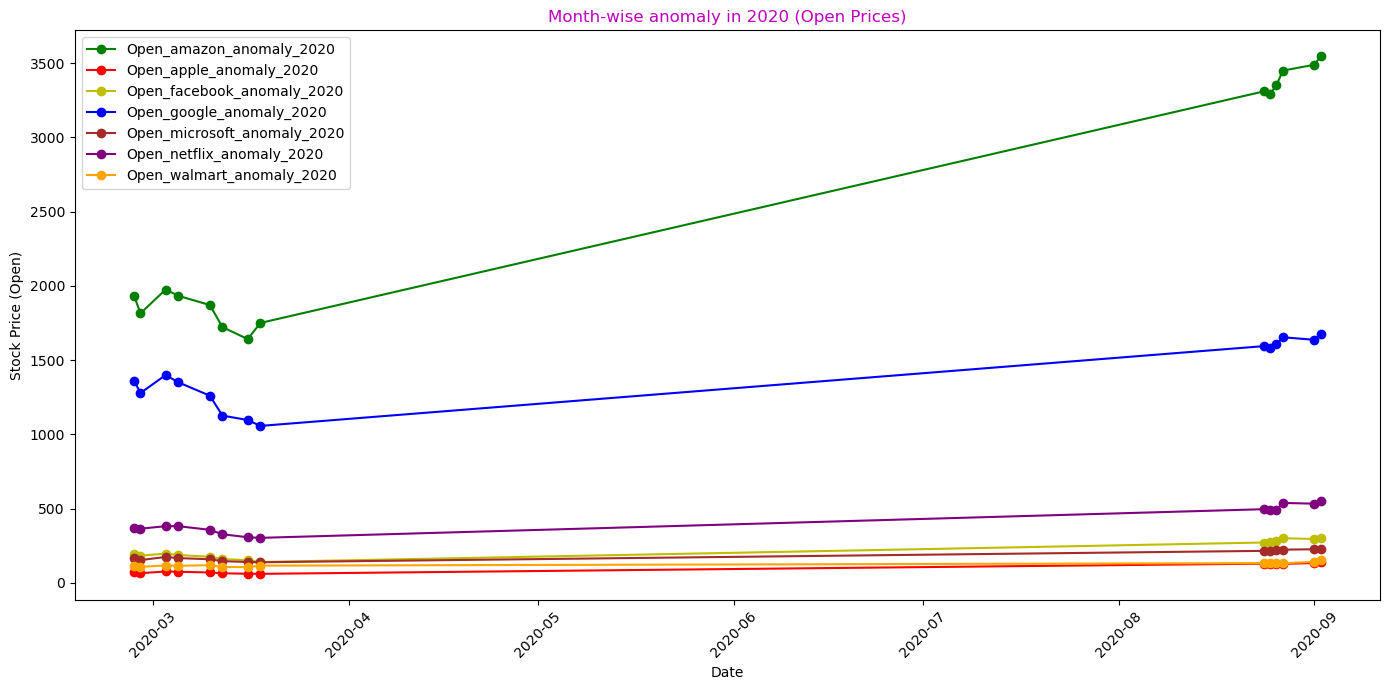

In [64]:
plt.figure(figsize=(14, 7))

# Plot the 'Open' prices for each company in 2020
plt.plot(ano_amazon_2020['Date'], ano_amazon_2020['Open_amazon'], color='g', marker='o', label='Open_amazon_anomaly_2020')
plt.plot(ano_apple_2020['Date'], ano_apple_2020['Open_apple'], color='r', marker='o', label='Open_apple_anomaly_2020')
plt.plot(ano_facebook_2020['Date'], ano_facebook_2020['Open_facebook'], color='y', marker='o', label='Open_facebook_anomaly_2020')
plt.plot(ano_google_2020['Date'], ano_google_2020['Open_google'], color='b', marker='o', label='Open_google_anomaly_2020')
plt.plot(ano_microsoft_2020['Date'], ano_microsoft_2020['Open_microsoft'], color='brown', marker='o', label='Open_microsoft_anomaly_2020')
plt.plot(ano_netflix_2020['Date'], ano_netflix_2020['Open_netflix'], color='purple', marker='o', label='Open_netflix_anomaly_2020')
plt.plot(ano_walmart_2020['Date'], ano_walmart_2020['Open_walmart'], color='orange', marker='o', label='Open_walmart_anomaly_2020')

plt.title('Month-wise anomaly in 2020 (Open Prices)', color='m')
plt.ylabel('Stock Price (Open)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

Close

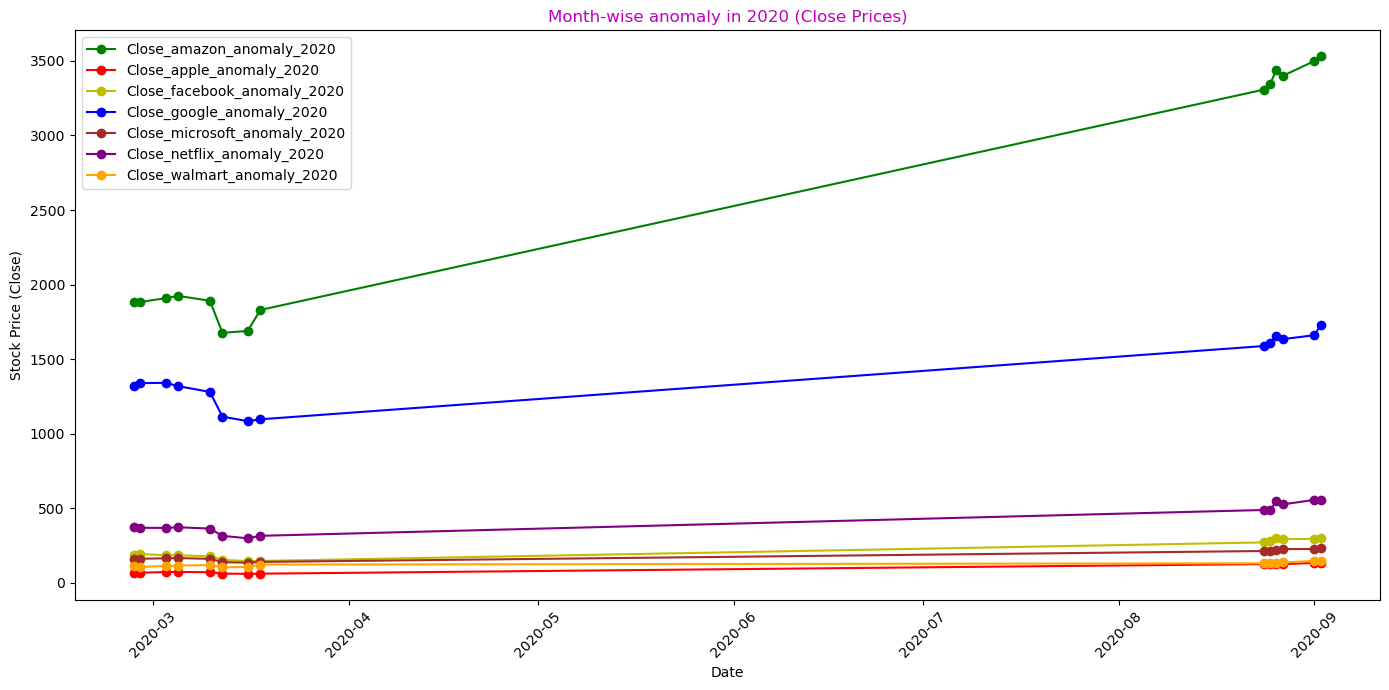

In [65]:
# Create a new figure for 'Close' prices in 2020
plt.figure(figsize=(14, 7))

# Plot the 'Close' prices for each company in 2020
plt.plot(ano_amazon_2020['Date'], ano_amazon_2020['Close_amazon'], color='g', marker='o', label='Close_amazon_anomaly_2020')
plt.plot(ano_apple_2020['Date'], ano_apple_2020['Close_apple'], color='r', marker='o', label='Close_apple_anomaly_2020')
plt.plot(ano_facebook_2020['Date'], ano_facebook_2020['Close_facebook'], color='y', marker='o', label='Close_facebook_anomaly_2020')
plt.plot(ano_google_2020['Date'], ano_google_2020['Close_google'], color='b', marker='o', label='Close_google_anomaly_2020')
plt.plot(ano_microsoft_2020['Date'], ano_microsoft_2020['Close_microsoft'], color='brown', marker='o', label='Close_microsoft_anomaly_2020')
plt.plot(ano_netflix_2020['Date'], ano_netflix_2020['Close_netflix'], color='purple', marker='o', label='Close_netflix_anomaly_2020')
plt.plot(ano_walmart_2020['Date'], ano_walmart_2020['Close_walmart'], color='orange', marker='o', label='Close_walmart_anomaly_2020')

plt.title('Month-wise anomaly in 2020 (Close Prices)', color='m')
plt.ylabel('Stock Price (Close)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

# 2021

In [66]:
# Filter the dataframes for the year 2021
ano_amazon_2021 = ano_amazon[ano_amazon['Year'] == 2021]
ano_apple_2021 = ano_apple[ano_apple['Year'] == 2021]
ano_facebook_2021 = ano_facebook[ano_facebook['Year'] == 2021]
ano_google_2021 = ano_google[ano_google['Year'] == 2021]
ano_microsoft_2021 = ano_microsoft[ano_microsoft['Year'] == 2021]
ano_netflix_2021 = ano_netflix[ano_netflix['Year'] == 2021]
ano_walmart_2021 = ano_walmart[ano_walmart['Year'] == 2021]

Open

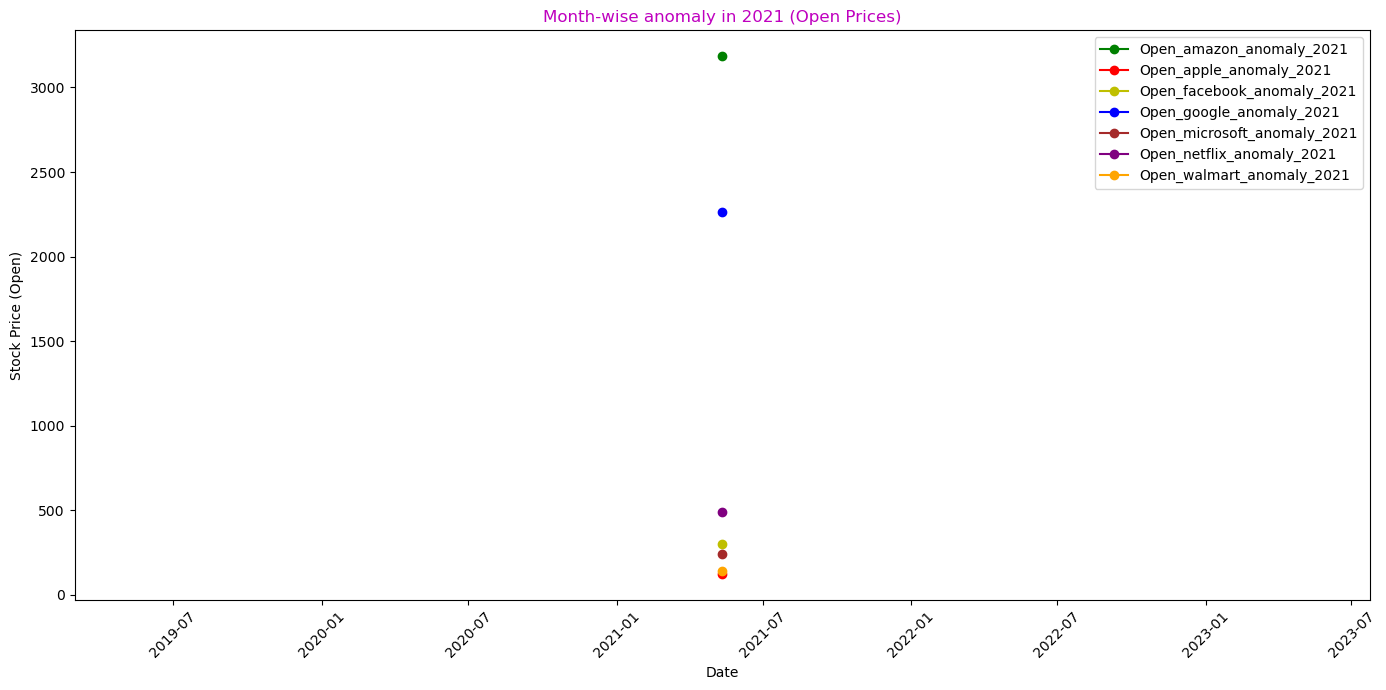

In [67]:
plt.figure(figsize=(14, 7))

# Plot the 'Open' prices for each company in 2021
plt.plot(ano_amazon_2021['Date'], ano_amazon_2021['Open_amazon'], color='g', marker='o', label='Open_amazon_anomaly_2021')
plt.plot(ano_apple_2021['Date'], ano_apple_2021['Open_apple'], color='r', marker='o', label='Open_apple_anomaly_2021')
plt.plot(ano_facebook_2021['Date'], ano_facebook_2021['Open_facebook'], color='y', marker='o', label='Open_facebook_anomaly_2021')
plt.plot(ano_google_2021['Date'], ano_google_2021['Open_google'], color='b', marker='o', label='Open_google_anomaly_2021')
plt.plot(ano_microsoft_2021['Date'], ano_microsoft_2021['Open_microsoft'], color='brown', marker='o', label='Open_microsoft_anomaly_2021')
plt.plot(ano_netflix_2021['Date'], ano_netflix_2021['Open_netflix'], color='purple', marker='o', label='Open_netflix_anomaly_2021')
plt.plot(ano_walmart_2021['Date'], ano_walmart_2021['Open_walmart'], color='orange', marker='o', label='Open_walmart_anomaly_2021')

plt.title('Month-wise anomaly in 2021 (Open Prices)', color='m')
plt.ylabel('Stock Price (Open)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

Close

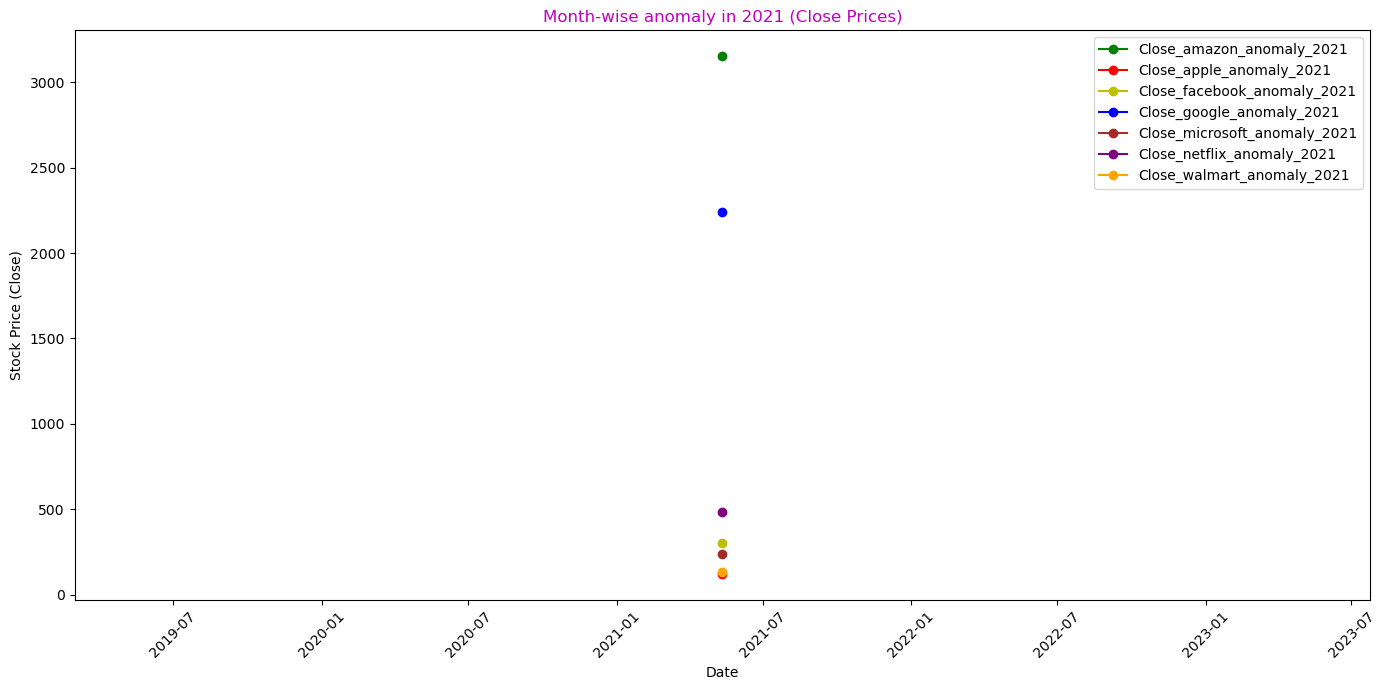

In [68]:
# Create a new figure for 'Close' prices in 2021
plt.figure(figsize=(14, 7))

# Plot the 'Close' prices for each company in 2021
plt.plot(ano_amazon_2021['Date'], ano_amazon_2021['Close_amazon'], color='g', marker='o', label='Close_amazon_anomaly_2021')
plt.plot(ano_apple_2021['Date'], ano_apple_2021['Close_apple'], color='r', marker='o', label='Close_apple_anomaly_2021')
plt.plot(ano_facebook_2021['Date'], ano_facebook_2021['Close_facebook'], color='y', marker='o', label='Close_facebook_anomaly_2021')
plt.plot(ano_google_2021['Date'], ano_google_2021['Close_google'], color='b', marker='o', label='Close_google_anomaly_2021')
plt.plot(ano_microsoft_2021['Date'], ano_microsoft_2021['Close_microsoft'], color='brown', marker='o', label='Close_microsoft_anomaly_2021')
plt.plot(ano_netflix_2021['Date'], ano_netflix_2021['Close_netflix'], color='purple', marker='o', label='Close_netflix_anomaly_2021')
plt.plot(ano_walmart_2021['Date'], ano_walmart_2021['Close_walmart'], color='orange', marker='o', label='Close_walmart_anomaly_2021')

plt.title('Month-wise anomaly in 2021 (Close Prices)', color='m')
plt.ylabel('Stock Price (Close)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

# Amazon

Open

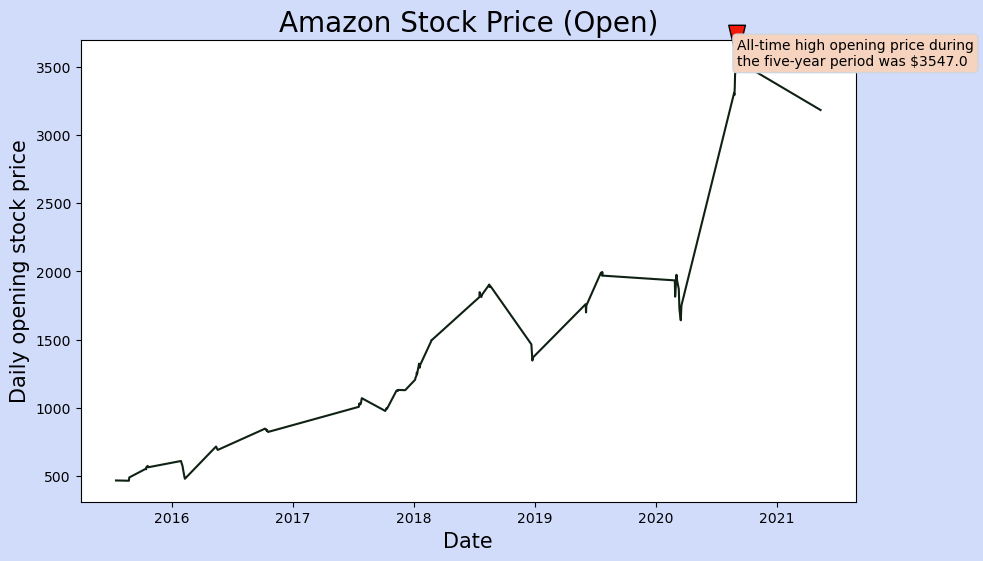

In [69]:
high_open = ano_amazon['Open_amazon'].max()
datetime_open = ano_amazon[ano_amazon['Open_amazon'] == high_open]['Date'].values

fig, ax = plt.subplots(figsize=(10,6), facecolor='#D1DCFB')
ax.plot(ano_amazon['Date'], ano_amazon['Open_amazon'], color='#0f2113')
ax.set_title("Amazon Stock Price (Open)", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily opening stock price", fontsize=15)
ax.annotate(f"All-time high opening price during\nthe five-year period was ${high_open}", 
            xy=(datetime_open, high_open),
            xytext=(datetime_open, high_open-35),
            bbox=dict(boxstyle="round", facecolor='#f5d3bf', edgecolor='#d0d5db'),
            arrowprops=dict(facecolor='#f0190a', headlength=25, shrink=0.1))
plt.show()


Close

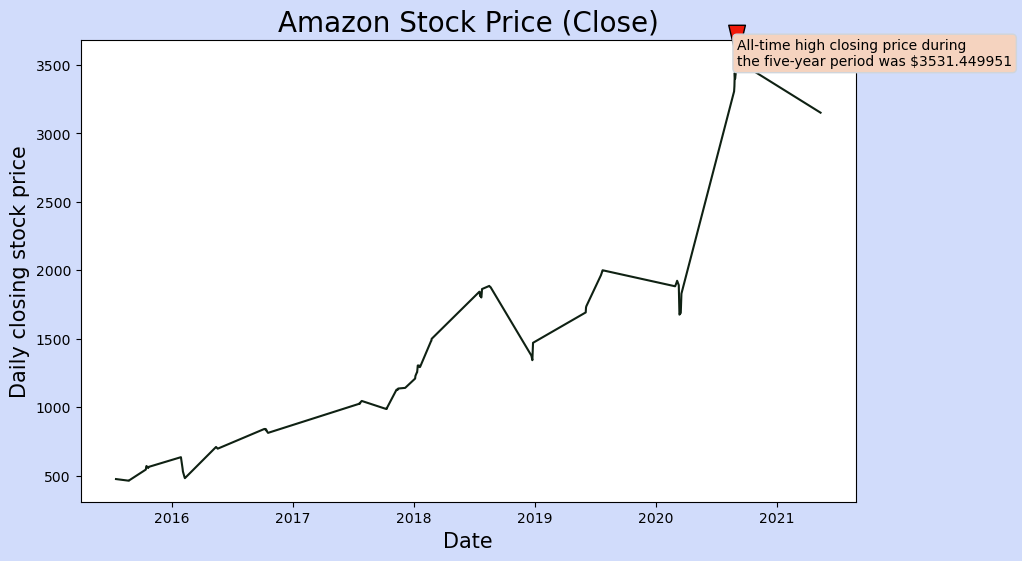

In [70]:
high_close = ano_amazon['Close_amazon'].max()
datetime_close = ano_amazon[ano_amazon['Close_amazon'] == high_close]['Date'].values

fig, ax = plt.subplots(figsize=(10,6), facecolor='#D1DCFB')
ax.plot(ano_amazon['Date'], ano_amazon['Close_amazon'], color='#0f2113')
ax.set_title("Amazon Stock Price (Close)", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily closing stock price", fontsize=15)
ax.annotate(f"All-time high closing price during\nthe five-year period was ${high_close}", 
            xy=(datetime_close, high_close),
            xytext=(datetime_close, high_close-35),
            bbox=dict(boxstyle="round", facecolor='#f5d3bf', edgecolor='#d0d5db'),
            arrowprops=dict(facecolor='#f0190a', headlength=25, shrink=0.1))
plt.show()


# Apple

Open

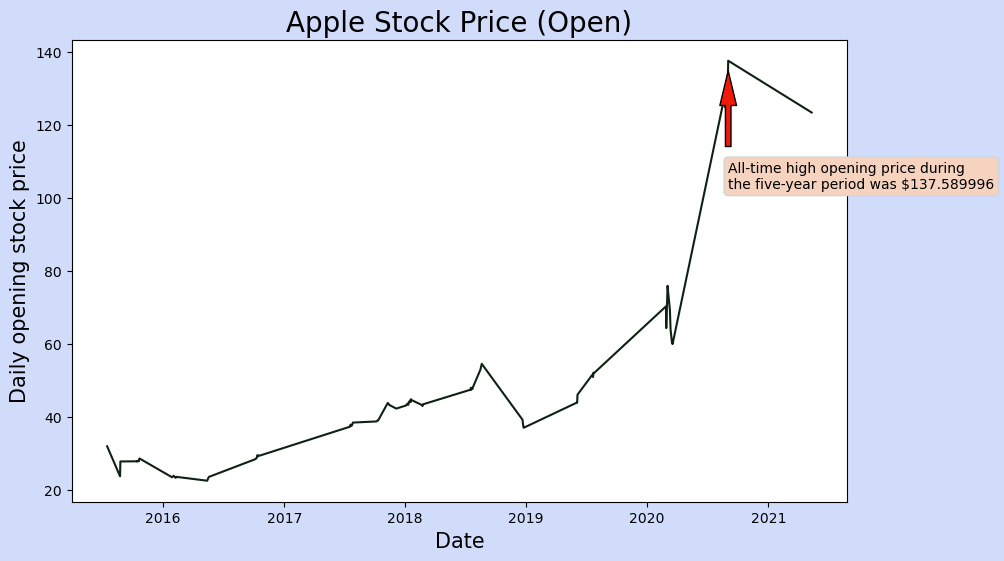

In [71]:
high_open = ano_apple['Open_apple'].max()
datetime_open = ano_apple[ano_apple['Open_apple'] == high_open]['Date'].values

fig, ax = plt.subplots(figsize=(10,6), facecolor='#D1DCFB')
ax.plot(ano_apple['Date'], ano_apple['Open_apple'], color='#0f2113')
ax.set_title("Apple Stock Price (Open)", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily opening stock price", fontsize=15)
ax.annotate(f"All-time high opening price during\nthe five-year period was ${high_open}", 
            xy=(datetime_open, high_open),
            xytext=(datetime_open, high_open-35),
            bbox=dict(boxstyle="round", facecolor='#f5d3bf', edgecolor='#d0d5db'),
            arrowprops=dict(facecolor='#f0190a', headlength=25, shrink=0.1))
plt.show()


Close

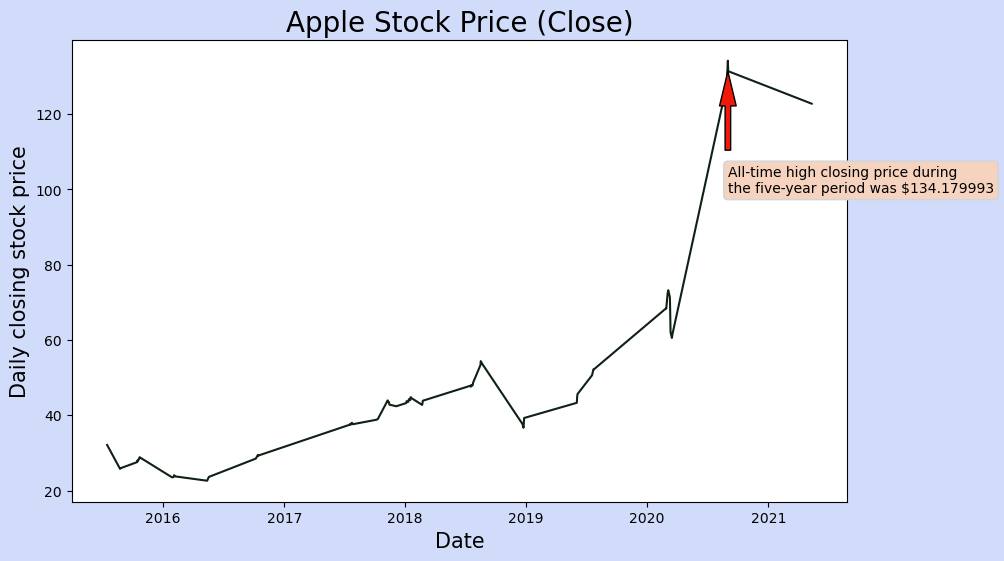

In [72]:
high_close = ano_apple['Close_apple'].max()
datetime_close = ano_apple[ano_apple['Close_apple'] == high_close]['Date'].values

fig, ax = plt.subplots(figsize=(10,6), facecolor='#D1DCFB')
ax.plot(ano_apple['Date'], ano_apple['Close_apple'], color='#0f2113')
ax.set_title("Apple Stock Price (Close)", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily closing stock price", fontsize=15)
ax.annotate(f"All-time high closing price during\nthe five-year period was ${high_close}", 
            xy=(datetime_close, high_close),
            xytext=(datetime_close, high_close-35),
            bbox=dict(boxstyle="round", facecolor='#f5d3bf', edgecolor='#d0d5db'),
            arrowprops=dict(facecolor='#f0190a', headlength=25, shrink=0.1))
plt.show()


# Facebook

Open

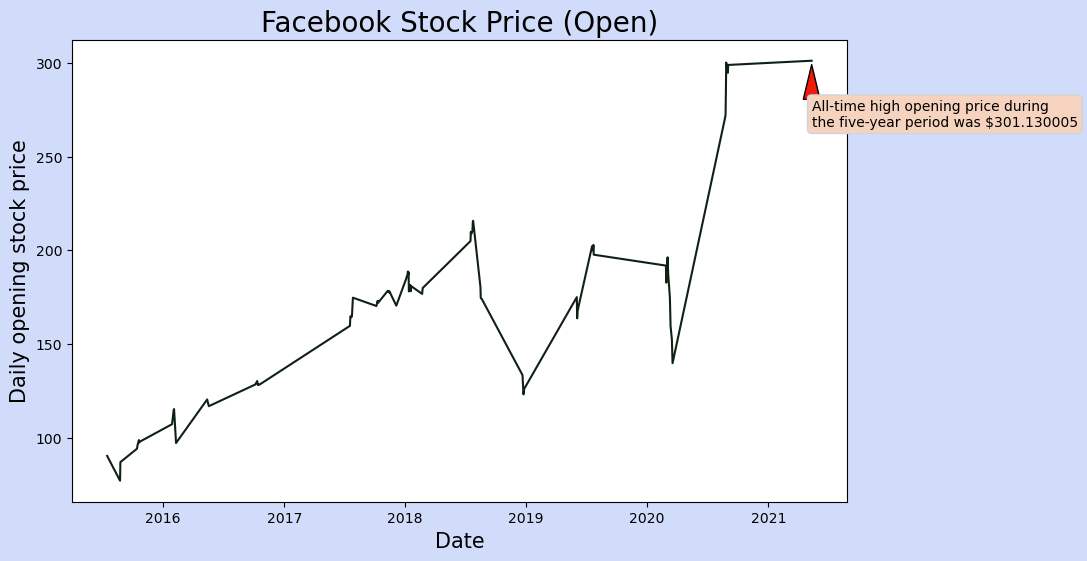

In [73]:
high_open = ano_facebook['Open_facebook'].max()
datetime_open = ano_facebook[ano_facebook['Open_facebook'] == high_open]['Date'].values

fig, ax = plt.subplots(figsize=(10,6), facecolor='#D1DCFB')
ax.plot(ano_facebook['Date'], ano_facebook['Open_facebook'], color='#0f2113')
ax.set_title("Facebook Stock Price (Open)", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily opening stock price", fontsize=15)
ax.annotate(f"All-time high opening price during\nthe five-year period was ${high_open}", 
            xy=(datetime_open, high_open),
            xytext=(datetime_open, high_open-35),
            bbox=dict(boxstyle="round", facecolor='#f5d3bf', edgecolor='#d0d5db'),
            arrowprops=dict(facecolor='#f0190a', headlength=25, shrink=0.1))
plt.show()


Close

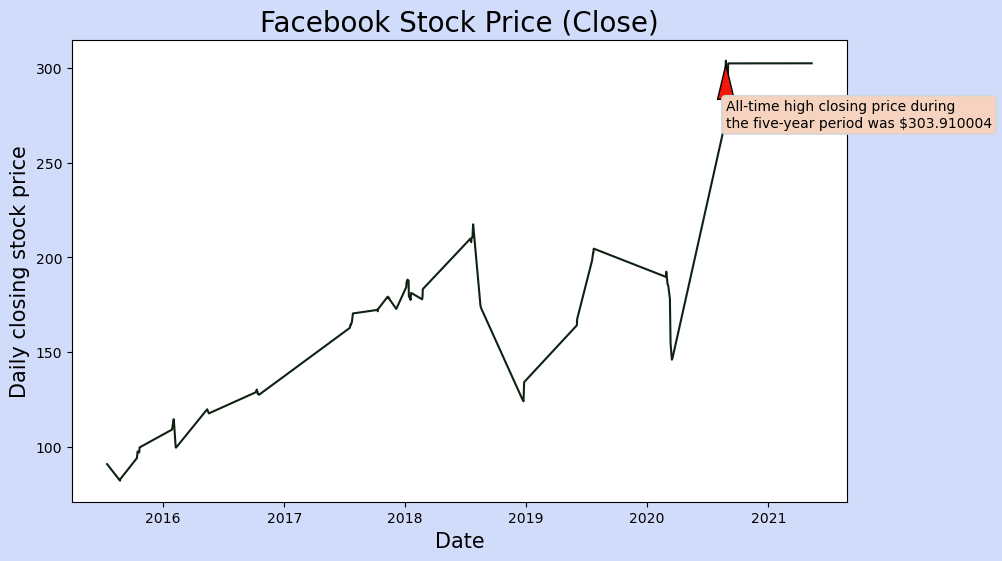

In [74]:
high_close = ano_facebook['Close_facebook'].max()
datetime_close = ano_facebook[ano_facebook['Close_facebook'] == high_close]['Date'].values

fig, ax = plt.subplots(figsize=(10,6), facecolor='#D1DCFB')
ax.plot(ano_facebook['Date'], ano_facebook['Close_facebook'], color='#0f2113')
ax.set_title("Facebook Stock Price (Close)", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily closing stock price", fontsize=15)
ax.annotate(f"All-time high closing price during\nthe five-year period was ${high_close}", 
            xy=(datetime_close, high_close),
            xytext=(datetime_close, high_close-35),
            bbox=dict(boxstyle="round", facecolor='#f5d3bf', edgecolor='#d0d5db'),
            arrowprops=dict(facecolor='#f0190a', headlength=25, shrink=0.1))
plt.show()


# Google

Open

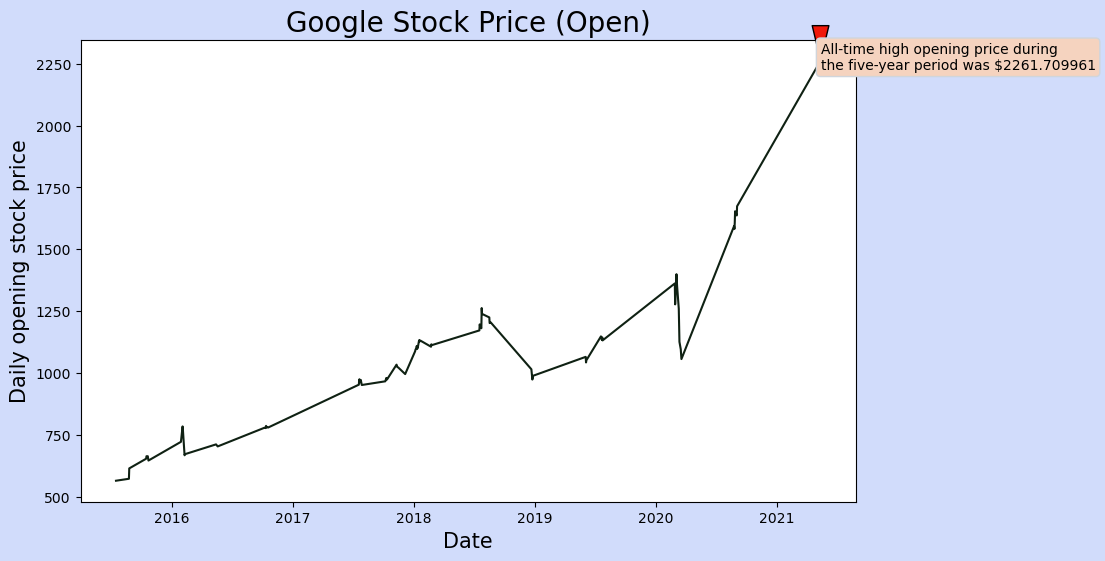

In [75]:
high_open = ano_google['Open_google'].max()
datetime_open = ano_google[ano_google['Open_google'] == high_open]['Date'].values

fig, ax = plt.subplots(figsize=(10,6), facecolor='#D1DCFB')
ax.plot(ano_google['Date'], ano_google['Open_google'], color='#0f2113')
ax.set_title("Google Stock Price (Open)", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily opening stock price", fontsize=15)
ax.annotate(f"All-time high opening price during\nthe five-year period was ${high_open}", 
            xy=(datetime_open, high_open),
            xytext=(datetime_open, high_open-35),
            bbox=dict(boxstyle="round", facecolor='#f5d3bf', edgecolor='#d0d5db'),
            arrowprops=dict(facecolor='#f0190a', headlength=25, shrink=0.1))
plt.show()


Close

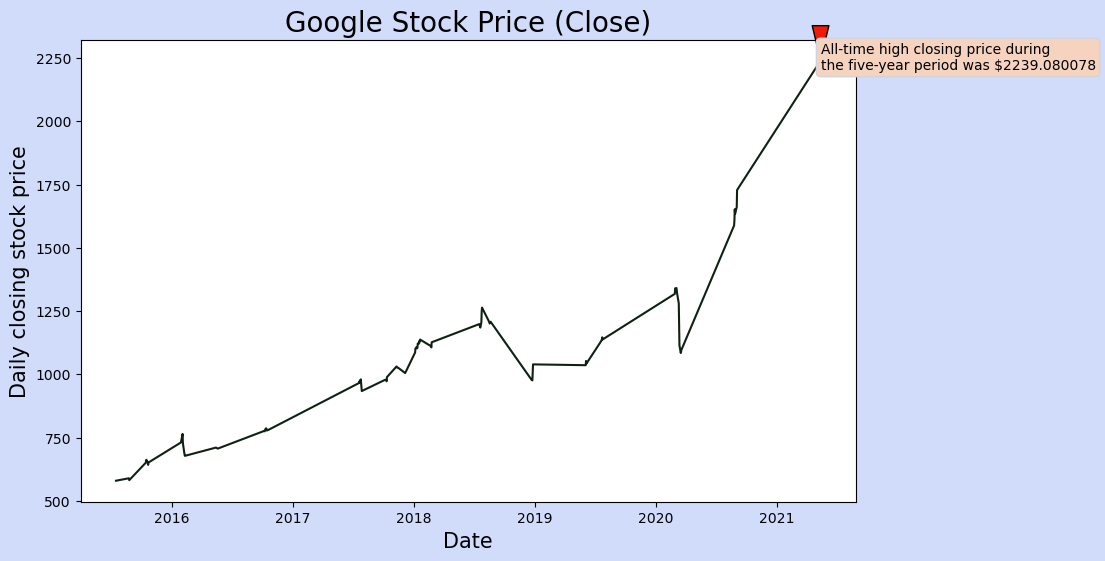

In [76]:
high_close = ano_google['Close_google'].max()
datetime_close = ano_google[ano_google['Close_google'] == high_close]['Date'].values

fig, ax = plt.subplots(figsize=(10,6), facecolor='#D1DCFB')
ax.plot(ano_google['Date'], ano_google['Close_google'], color='#0f2113')
ax.set_title("Google Stock Price (Close)", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily closing stock price", fontsize=15)
ax.annotate(f"All-time high closing price during\nthe five-year period was ${high_close}", 
            xy=(datetime_close, high_close),
            xytext=(datetime_close, high_close-35),
            bbox=dict(boxstyle="round", facecolor='#f5d3bf', edgecolor='#d0d5db'),
            arrowprops=dict(facecolor='#f0190a', headlength=25, shrink=0.1))
plt.show()


# Microsoft

Open

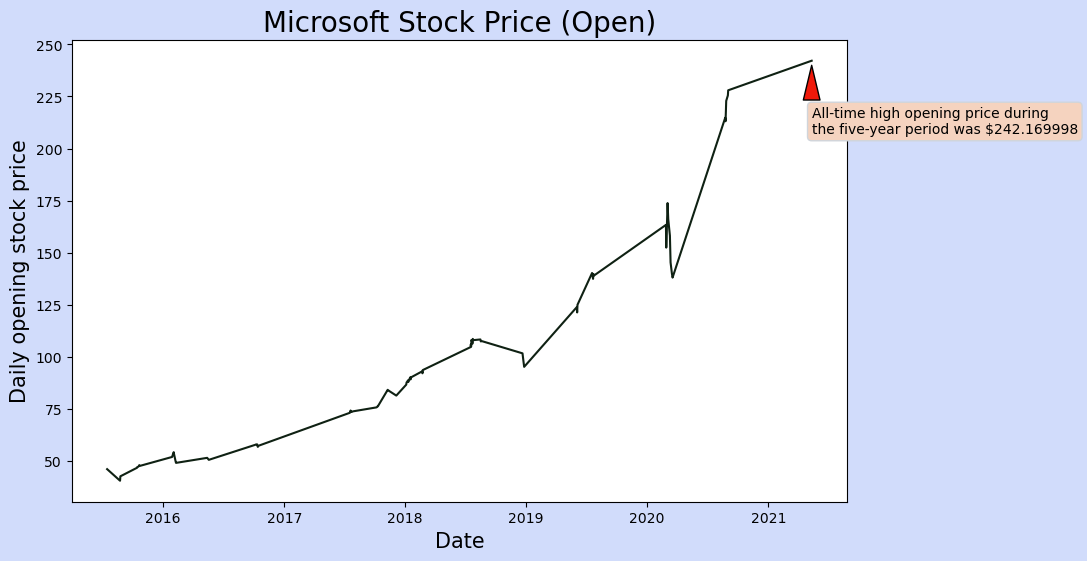

In [77]:
high_open = ano_microsoft['Open_microsoft'].max()
datetime_open = ano_microsoft[ano_microsoft['Open_microsoft'] == high_open]['Date'].values

fig, ax = plt.subplots(figsize=(10,6), facecolor='#D1DCFB')
ax.plot(ano_microsoft['Date'], ano_microsoft['Open_microsoft'], color='#0f2113')
ax.set_title("Microsoft Stock Price (Open)", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily opening stock price", fontsize=15)
ax.annotate(f"All-time high opening price during\nthe five-year period was ${high_open}", 
            xy=(datetime_open, high_open),
            xytext=(datetime_open, high_open-35),
            bbox=dict(boxstyle="round", facecolor='#f5d3bf', edgecolor='#d0d5db'),
            arrowprops=dict(facecolor='#f0190a', headlength=25, shrink=0.1))
plt.show()


Close

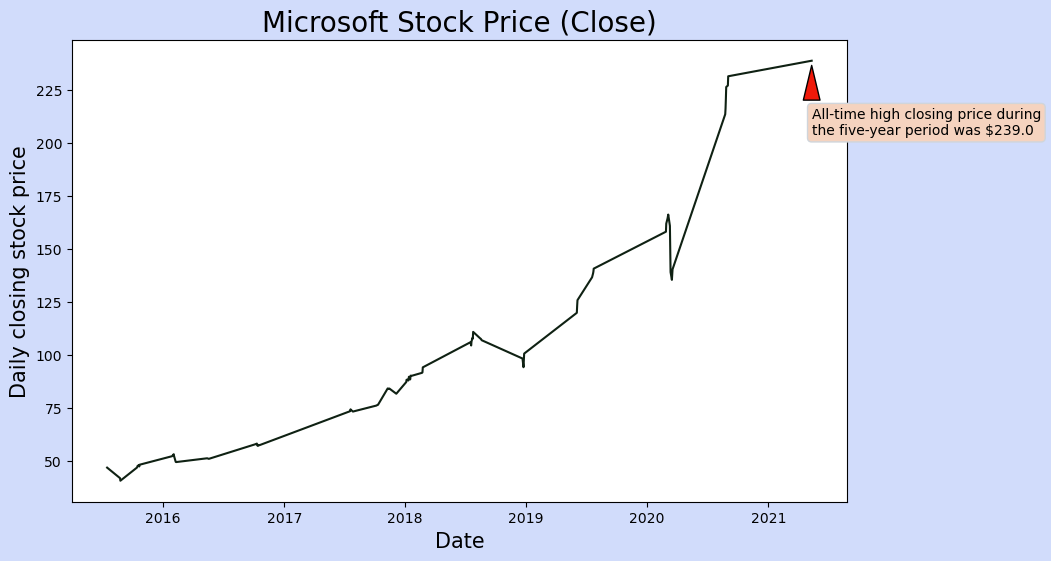

In [78]:
high_close = ano_microsoft['Close_microsoft'].max()
datetime_close = ano_microsoft[ano_microsoft['Close_microsoft'] == high_close]['Date'].values

fig, ax = plt.subplots(figsize=(10,6), facecolor='#D1DCFB')
ax.plot(ano_microsoft['Date'], ano_microsoft['Close_microsoft'], color='#0f2113')
ax.set_title("Microsoft Stock Price (Close)", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily closing stock price", fontsize=15)
ax.annotate(f"All-time high closing price during\nthe five-year period was ${high_close}", 
            xy=(datetime_close, high_close),
            xytext=(datetime_close, high_close-35),
            bbox=dict(boxstyle="round", facecolor='#f5d3bf', edgecolor='#d0d5db'),
            arrowprops=dict(facecolor='#f0190a', headlength=25, shrink=0.1))
plt.show()


# Netflix

Open

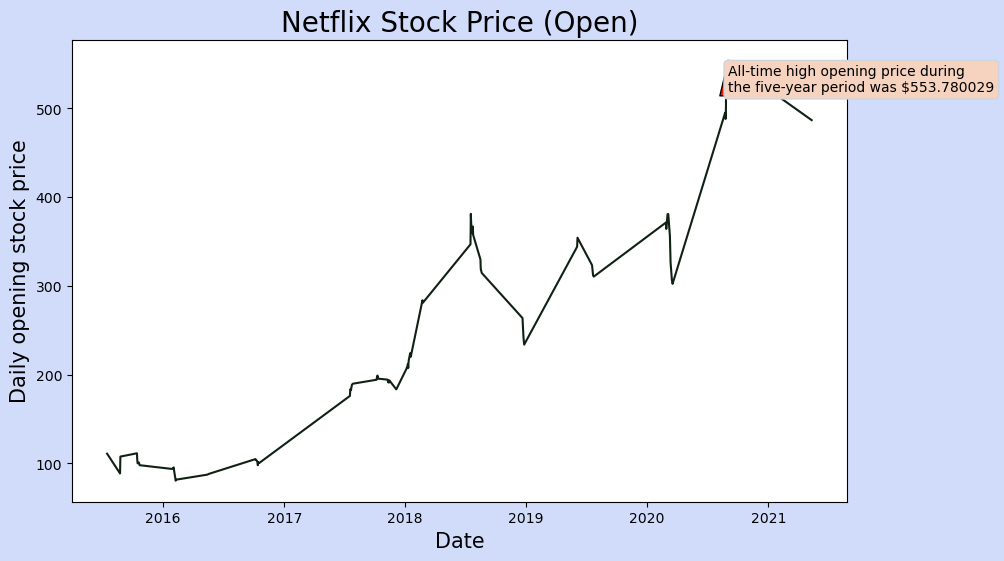

In [79]:
high_open = ano_netflix['Open_netflix'].max()
datetime_open = ano_netflix[ano_netflix['Open_netflix'] == high_open]['Date'].values

fig, ax = plt.subplots(figsize=(10,6), facecolor='#D1DCFB')
ax.plot(ano_netflix['Date'], ano_netflix['Open_netflix'], color='#0f2113')
ax.set_title("Netflix Stock Price (Open)", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily opening stock price", fontsize=15)
ax.annotate(f"All-time high opening price during\nthe five-year period was ${high_open}", 
            xy=(datetime_open, high_open),
            xytext=(datetime_open, high_open-35),
            bbox=dict(boxstyle="round", facecolor='#f5d3bf', edgecolor='#d0d5db'),
            arrowprops=dict(facecolor='#f0190a', headlength=25, shrink=0.1))
plt.show()


Close

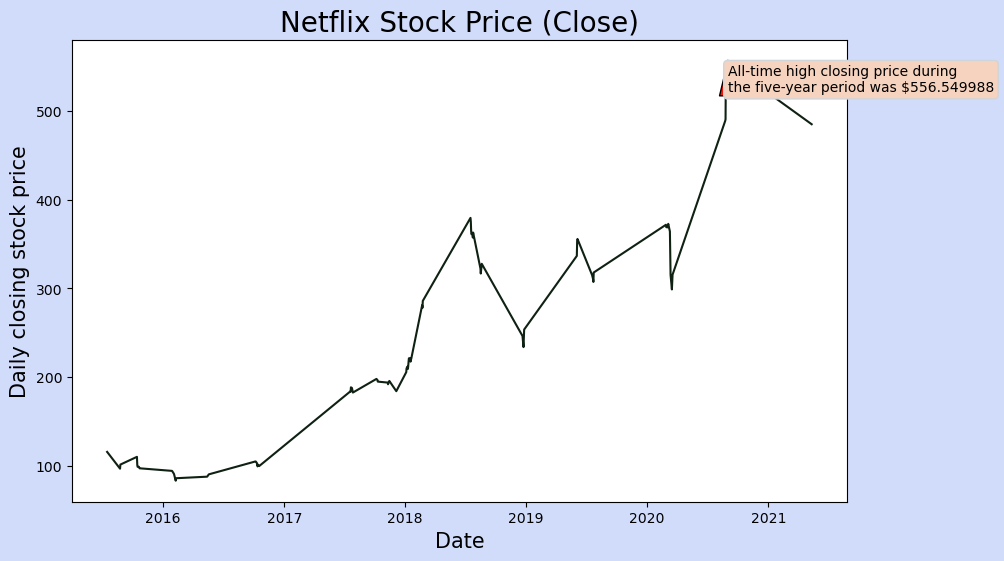

In [80]:
high_close = ano_netflix['Close_netflix'].max()
datetime_close = ano_netflix[ano_netflix['Close_netflix'] == high_close]['Date'].values

fig, ax = plt.subplots(figsize=(10,6), facecolor='#D1DCFB')
ax.plot(ano_netflix['Date'], ano_netflix['Close_netflix'], color='#0f2113')
ax.set_title("Netflix Stock Price (Close)", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily closing stock price", fontsize=15)
ax.annotate(f"All-time high closing price during\nthe five-year period was ${high_close}", 
            xy=(datetime_close, high_close),
            xytext=(datetime_close, high_close-35),
            bbox=dict(boxstyle="round", facecolor='#f5d3bf', edgecolor='#d0d5db'),
            arrowprops=dict(facecolor='#f0190a', headlength=25, shrink=0.1))
plt.show()


# Walmart

Open

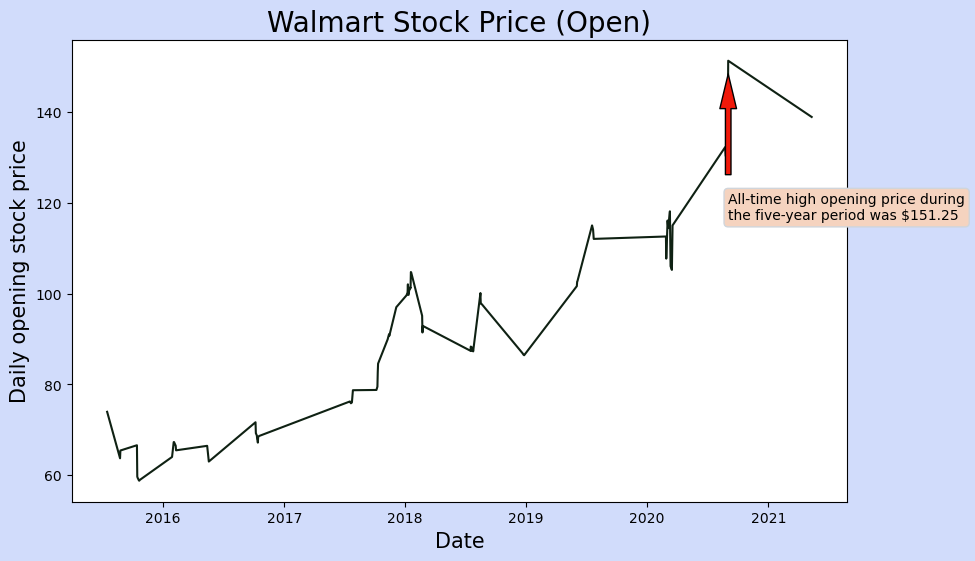

In [81]:
high_open = ano_walmart['Open_walmart'].max()
datetime_open = ano_walmart[ano_walmart['Open_walmart'] == high_open]['Date'].values

fig, ax = plt.subplots(figsize=(10,6), facecolor='#D1DCFB')
ax.plot(ano_walmart['Date'], ano_walmart['Open_walmart'], color='#0f2113')
ax.set_title("Walmart Stock Price (Open)", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily opening stock price", fontsize=15)
ax.annotate(f"All-time high opening price during\nthe five-year period was ${high_open}", 
            xy=(datetime_open, high_open),
            xytext=(datetime_open, high_open-35),
            bbox=dict(boxstyle="round", facecolor='#f5d3bf', edgecolor='#d0d5db'),
            arrowprops=dict(facecolor='#f0190a', headlength=25, shrink=0.1))
plt.show()


Close

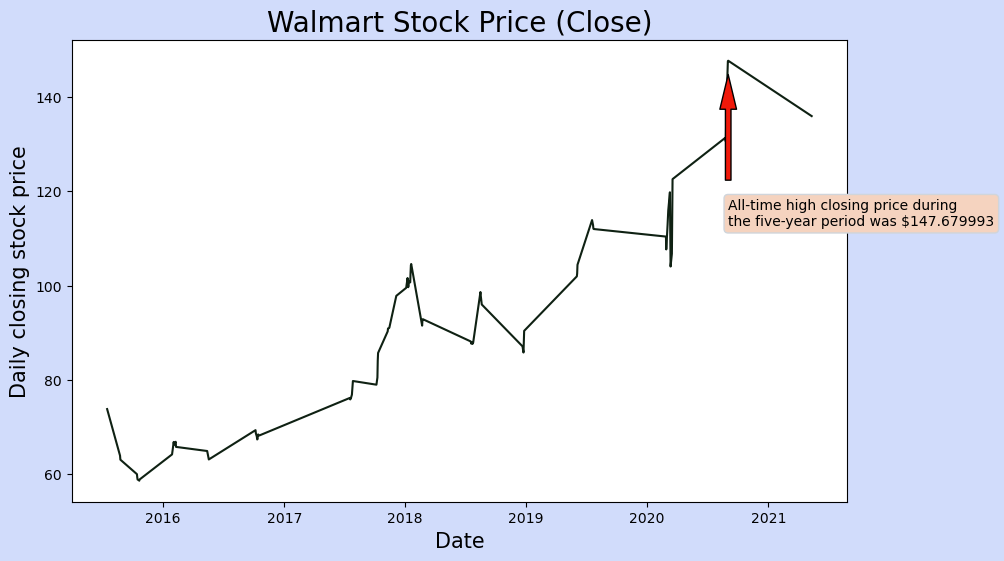

In [82]:
high_close = ano_walmart['Close_walmart'].max()
datetime_close = ano_walmart[ano_walmart['Close_walmart'] == high_close]['Date'].values

fig, ax = plt.subplots(figsize=(10,6), facecolor='#D1DCFB')
ax.plot(ano_walmart['Date'], ano_walmart['Close_walmart'], color='#0f2113')
ax.set_title("Walmart Stock Price (Close)", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily closing stock price", fontsize=15)
ax.annotate(f"All-time high closing price during\nthe five-year period was ${high_close}", 
            xy=(datetime_close, high_close),
            xytext=(datetime_close, high_close-35),
            bbox=dict(boxstyle="round", facecolor='#f5d3bf', edgecolor='#d0d5db'),
            arrowprops=dict(facecolor='#f0190a', headlength=25, shrink=0.1))
plt.show()


# Result

Between 2020 and 2022, FAANG+2 companies (Facebook, Amazon, Apple, Netflix, Google, Microsoft, and Walmart) demonstrated remarkable resilience amidst market turbulence, with several of them reaching historic high stock prices. While their stock prices generally followed an upward trajectory, punctuated by occasional sharp declines due to external factors like the COVID-19 pandemic and concerns about rising interest rates, these tech giants stood out. High-performing companies like Amazon and Google achieved remarkable milestones with all-time high opening and closing prices, indicating robust financial health and continued growth. Amazon reached an all-time high opening price of $3,547 and a closing price of $3,531,The all-time high closing price during the five-year period of google was $2239.080078 on January 26, 2022 and mostly in the third place netflix shows the all-time high closing price during the five-year period was $556. These high stock prices were emblematic of their robust financial performances and continued growth, and they are worthy of comparison with the other companies in the group. While each company faced its unique challenges, such as the COVID-19 pandemic's initial impact and concerns over rising interest rates, these tech giants generally demonstrated an upward trajectory in stock prices.

Other firms, such as Walmart and Netflix, capitalized on changing consumer behaviors during the pandemic, driving their stock prices upward. However, challenges, including heightened competition and cost pressures that manifested in Netflix's slowing subscriber growth, underscored the complex dynamics within this evolving landscape. These insights underscore the intricate dynamics at play within the market during this period and highlight the adaptability and long-term growth potential of these companies, with Amazon and Apple serving as noteworthy examples of their financial strength and market dominance